In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import missingno as msno

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
# from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics



from scipy.stats.mstats import winsorize

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler as smot
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [2]:
# !pip install lazypredict

In [3]:
# !pip uninstall scikit-learn -y


In [4]:
# !pip install scikit-learn==0.23.1

In [5]:
# import lazypredict

In [6]:
# from lazypredict.Supervised import LazyClassifier

In [7]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.datasets import load_diabetes
# from sklearn.model_selection import train_test_split
# # from lazypredict.Supervised import LazyRegressor
# # from sklearn import datasets
# from sklearn.utils import shuffle
# # import numpy as np

### Reading CSV files

In [8]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [9]:
nasdaq = pd.read_csv("nasdaq.csv")

In [10]:
nasdaq.shape

(7998, 3)

In [11]:
nasdaq.columns

Index(['Symbol', 'Name', 'Country'], dtype='object')

In [12]:
nasdaq.head()

,Symbol,Name,Country
0,A,Agilent Technologies Inc. Common Stock,United States
1,AA,Alcoa Corporation Common Stock,NaN
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,NaN
3,AACG,ATA Creativity Global American Depositary Shares,China
4,AACIU,Armada Acquisition Corp. I Unit,United States


In [13]:
nasdaq.drop('Name', axis=1, inplace=True)

In [14]:
df_2014.shape

(3808, 225)

In [15]:
df_2015.shape

(4120, 225)

In [16]:
df_2016.shape

(4797, 225)

In [17]:
df_2017.shape

(4960, 225)

In [18]:
df_2018.shape

(4392, 225)

In [19]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [20]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [21]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [22]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [23]:
df.shape

(22077, 226)

In [24]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [25]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014


In [26]:
df.rename(columns={"Unnamed: 0": "Symbol"}, inplace=True)
# df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [27]:
df = pd.merge(df, nasdaq, how="inner", on="Symbol")

In [28]:
df.shape

(18703, 227)

In [29]:
df.head()

,Symbol,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year,Country
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,2014,United States
1,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,2015,United States
2,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,2016,United States
3,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,2017,United States
4,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,2018,United States


In [30]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
South Korea          45
Taiwan               45
Cayman Islands       45
Germany              39
Hong Kong            37
Luxembourg           35
South Africa         35
Japan                35
Chile                30
Singapore            30
Denmark              23
Spain                20
Belgium              20
Peru                 15
Puerto Rico          15
Colombia             15
Monaco               15
Sweden               15
Italy                10
Jersey               10
Curacao              10
Russia               10
Panama               10
Macau                 5
Guernsey              5
Finland         

In [31]:
df.Country.isnull().sum()

787

In [32]:
#Next_Year_Price_Var[%] +ve ---> class = 1, if -ve -----> class = 0
df.drop('Next_Year_Price_Var[%]', axis=1, inplace=True)

In [33]:
df.rename(columns={"Symbol":"Name"}, inplace=True)

In [34]:
df.Name.nunique()

4116

In [35]:
df.shape

(18703, 226)

In [36]:
df.info

<bound method DataFrame.info of         Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1         PG  7.074900e+10         -0.0491     3.705600e+10  3.369300e+10   
2         PG  6.529900e+10         -0.0770     3.290900e+10  3.239000e+10   
3         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
4         PG  6.683200e+10          0.0273     3.443200e+10  3.240000e+10   
...      ...           ...             ...              ...           ...   
18698    BAK  1.494842e+10          0.0047     1.196681e+10  2.981610e+09   
18699    DNB  3.011000e+09             NaN     2.325000e+09  6.860000e+08   
18700   HYAC           NaN             NaN              NaN           NaN   
18701  HYACU           NaN             NaN              NaN           NaN   
18702    LCA  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   

       R&D Expenses  SG&A Expense  Operatin

In [37]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,Year
count,1.786500e+04,17335.000000,1.739000e+04,1.784100e+04,1.719400e+04,1.746200e+04,1.740500e+04,1.792300e+04,1.738800e+04,1.778000e+04,...,15909.000000,17283.000000,17015.000000,17053.000000,16664.000000,16865.000000,16999.000000,17053.000000,18703.000000,18703.000000
mean,5.131141e+09,4.044478,3.194422e+09,2.017499e+09,1.099452e+08,9.257510e+08,1.427406e+09,6.293855e+08,9.737632e+07,5.375073e+08,...,0.018180,12.531312,0.153511,0.829158,0.871056,3.682542,0.296431,0.257921,0.563706,2016.085548
std,2.094265e+10,335.687819,1.515262e+10,8.058267e+09,8.007416e+08,3.954889e+09,5.768307e+09,2.986434e+09,4.666766e+08,2.587647e+09,...,0.262661,1183.058348,3.057425,43.258736,57.650800,184.199300,13.801622,3.901991,0.495938,1.378392
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-379.478300,-1.051000,-2.662200,-2.369900,0.000000,2014.000000
25%,6.571986e+07,-0.011300,3.883750e+06,3.512800e+07,0.000000e+00,1.887951e+07,3.835900e+07,-2.692896e+06,0.000000e+00,-6.229009e+06,...,0.000000,-0.047100,0.000000,-0.025900,-0.093025,-0.064400,0.000000,-0.010900,0.000000,2015.000000
50%,4.771070e+08,0.058600,1.717705e+08,2.137290e+08,0.000000e+00,8.901150e+07,1.664520e+08,4.391900e+07,3.823064e+06,3.094914e+07,...,0.000000,0.010900,0.000000,0.049500,0.035300,0.000000,0.000000,0.060500,1.000000,2016.000000
75%,2.565486e+09,0.178700,1.333174e+09,9.678560e+08,1.265675e+07,4.091312e+08,6.747880e+08,2.880000e+08,5.092050e+07,2.287124e+08,...,0.049800,0.195450,0.064200,0.173500,0.141525,0.150300,0.000000,0.179300,1.000000,2017.000000
max,8.482620e+11,42138.663900,3.861020e+11,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,324.926800,1.000000,2018.000000


In [38]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [39]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [40]:
df.head(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,1,United States


In [41]:
df.loc[(df.Country=="United States")].shape

(14964, 224)

In [42]:
df.loc[(df.Country=="United States")]

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,1,United States
2,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,1.385000e+10,...,-0.0427,-0.0528,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,1,United States
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,1,United States
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,1,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18697,NaN,NaN,NaN,3.648000e+09,NaN,NaN,7.947000e+09,2.206000e+09,-43000000.0,NaN,...,0.0827,0.0000,0.2680,0.2433,-0.0196,NaN,NaN,Consumer Cyclical,0,United States
18699,3.011000e+09,NaN,2.325000e+09,6.860000e+08,NaN,6.230000e+08,6.100000e+08,7.600000e+07,94000000.0,1.600000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States
18700,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States
18701,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States


In [43]:
# Selecting only United States

In [44]:
df = df.loc[(df.Country=="United States")]

In [45]:
df.drop('Country', axis=1, inplace=True)

### Understanding Null Value Distribution

In [46]:
df.isnull().sum().sort_values(ascending=False)

operatingCycle                    14964
cashConversionCycle               14964
shortTermCoverageRatios            7418
priceEarningsToGrowthRatio         5473
dividendPayoutRatio                5473
                                  ...  
Operating Income                    725
Net cash flow / Change in cash      716
Financing Cash Flow                 699
Sector                                0
Class                                 0
Length: 223, dtype: int64

In [47]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

operatingCycle                    100.000000
cashConversionCycle               100.000000
shortTermCoverageRatios            49.572307
priceEarningsToGrowthRatio         36.574445
dividendPayoutRatio                36.574445
                                     ...    
Operating Income                    4.844961
Net cash flow / Change in cash      4.784817
Financing Cash Flow                 4.671211
Sector                              0.000000
Class                               0.000000
Length: 223, dtype: float64

In [48]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                             0.000000
Sector                            0.000000
Financing Cash Flow               4.671211
Net cash flow / Change in cash    4.784817
Operating Income                  4.844961
Receivables                       4.851644
Revenue                           4.998663
Earnings Before Tax Margin        5.052125
Gross Margin                      5.078856
Operating Cash Flow               5.145683
Gross Profit                      5.239241
Retained earnings (deficit)       5.339481
Cash and cash equivalents         5.352847
Earnings before Tax               5.526597
EPS                               5.593424
dtype: float64

In [49]:
# all cols have some null values
len(df.isnull().any())

223

In [50]:
# No columns with all null values
df.columns[df.isnull().all()]

Index(['operatingCycle', 'cashConversionCycle'], dtype='object')

In [51]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

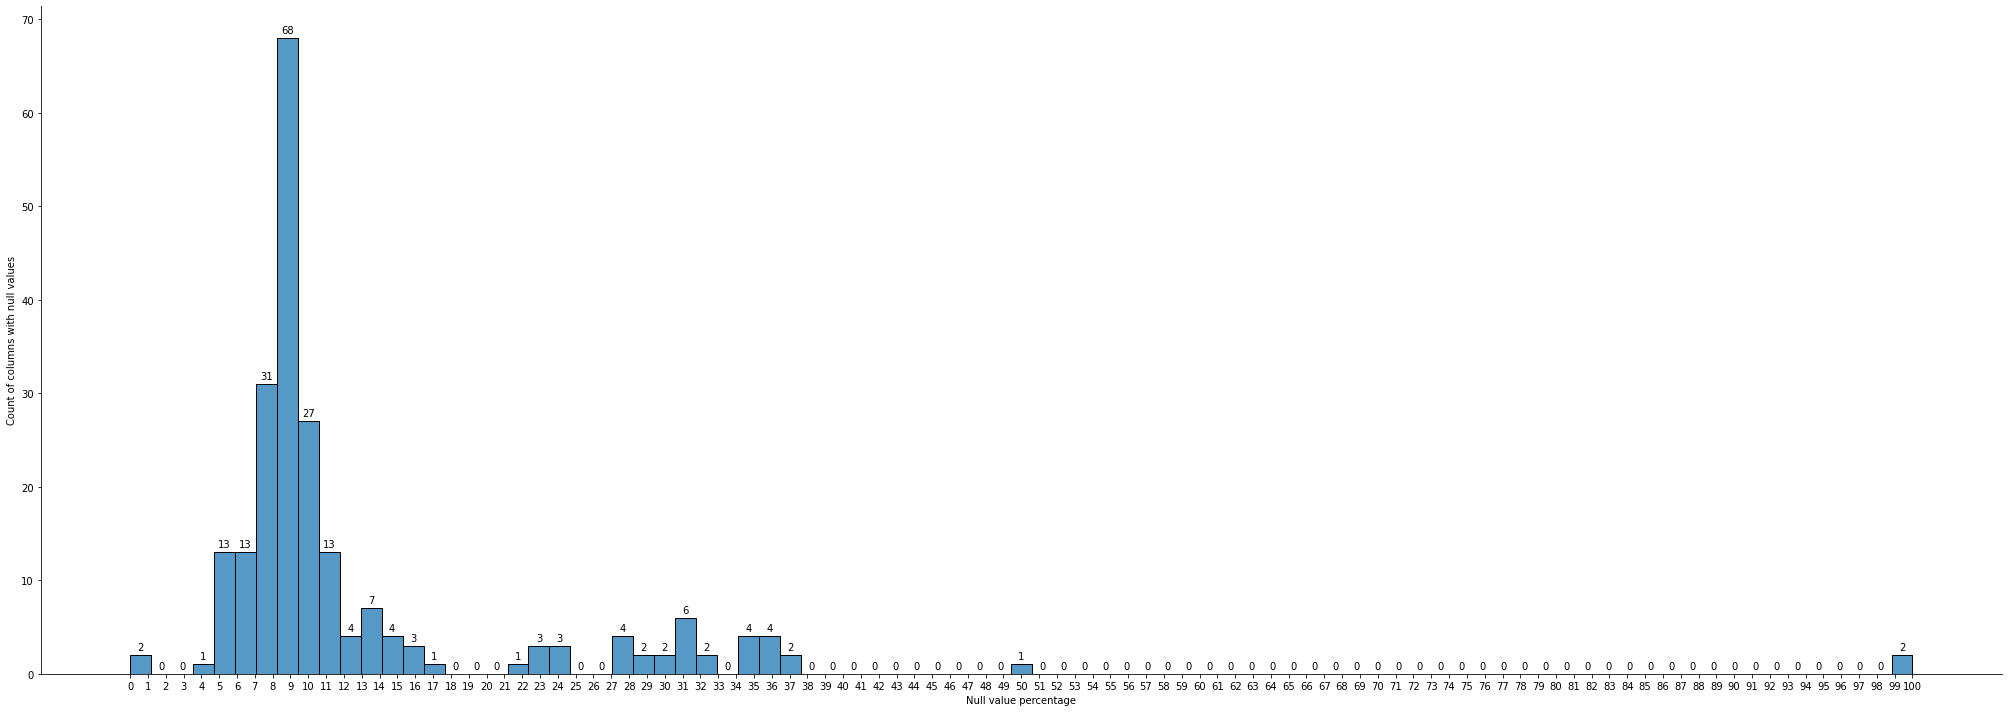

In [52]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

<AxesSubplot:>

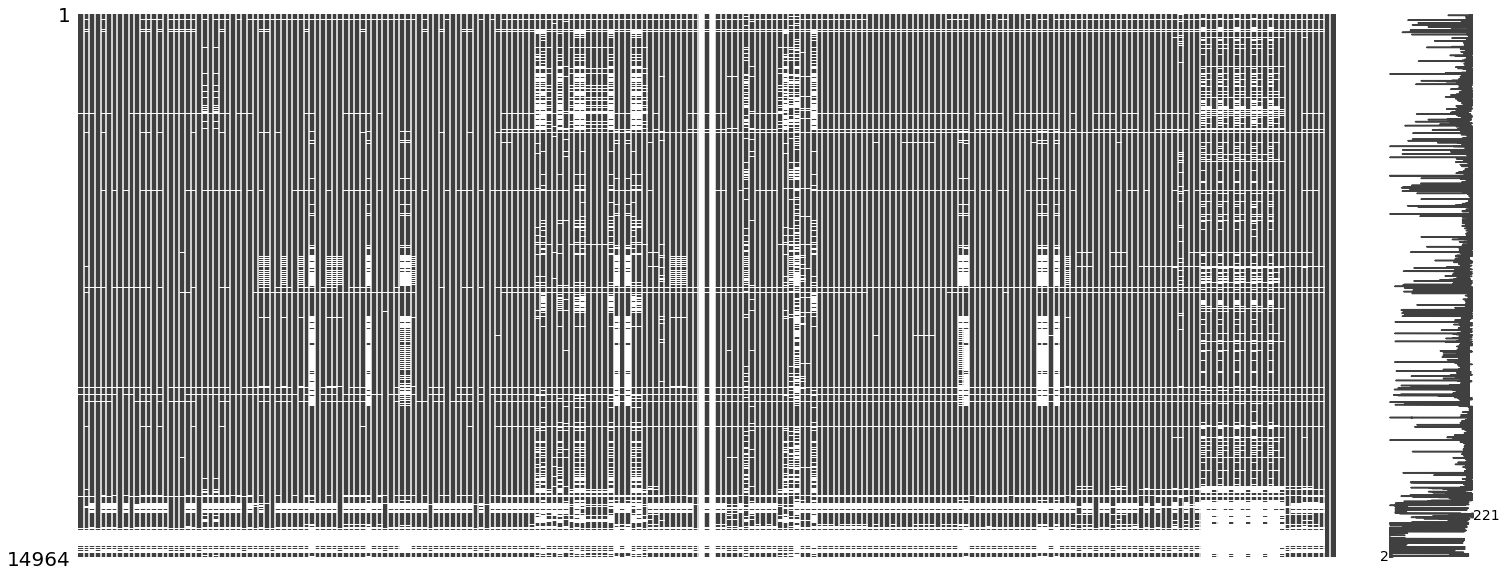

In [53]:
msno.matrix(df)

In [54]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [55]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [56]:
len(greater_than_70)

2

In [57]:
greater_than_70

,Percentage
operatingCycle,100.0
cashConversionCycle,100.0


In [58]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [59]:
len(greater_than_50)

2

In [60]:
greater_than_50

,Percentage
operatingCycle,100.0
cashConversionCycle,100.0


In [61]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

,Percentage
operatingCycle,100.00
cashConversionCycle,100.00
shortTermCoverageRatios,49.57
priceEarningsToGrowthRatio,36.57
dividendPayoutRatio,36.57
10Y Shareholders Equity Growth (per Share),36.44
10Y Net Income Growth (per Share),35.74
10Y Revenue Growth (per Share),35.74
10Y Operating CF Growth (per Share),35.52
effectiveTaxRate,34.60


### Removing Null Values

In [62]:
# function to drop cols which have more than 20% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [63]:
df.shape

(14964, 223)

In [64]:
remove_cols_with_nulls(df, 20)

In [65]:
df.shape

(14964, 187)

In [66]:
len(df.columns[(df.isnull().any())])

185

In [67]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [68]:
# Therefore, there is no row will all NULL values
df.shape

(14964, 187)

In [69]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [70]:
df.shape

(9358, 187)

<AxesSubplot:>

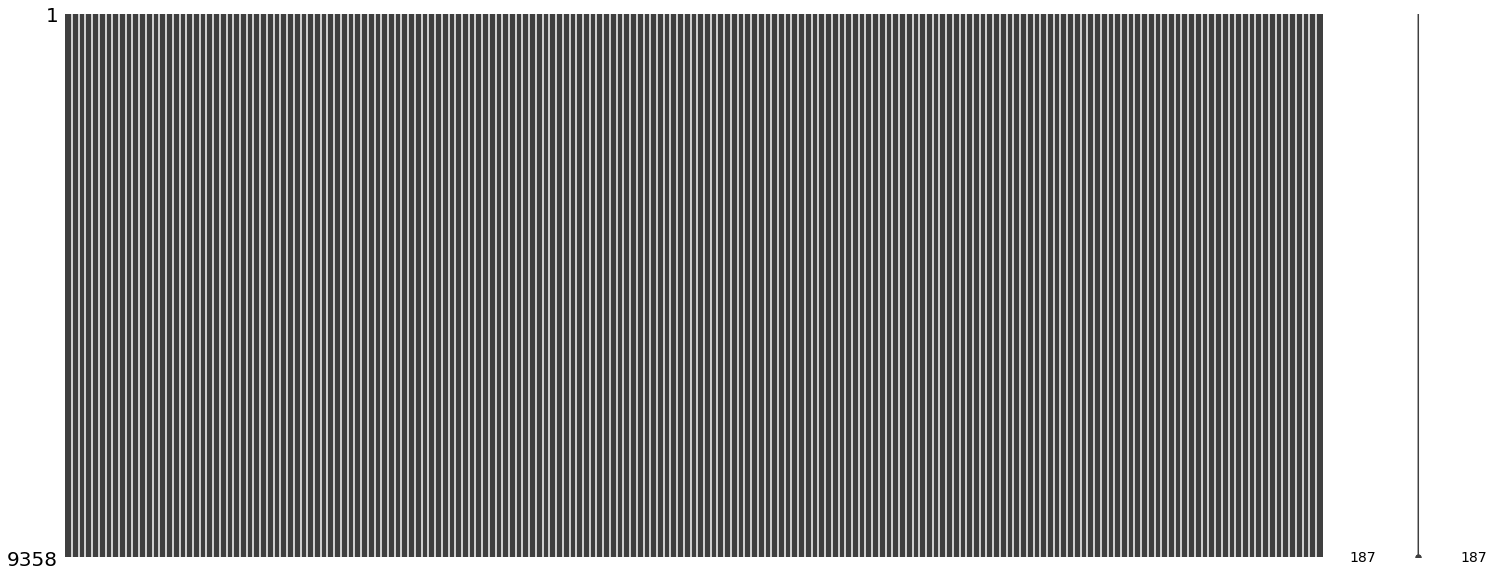

In [71]:
msno.matrix(df)

In [72]:
df.isnull().any().sum()

0

In [73]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Class'],
      dtype='object', length=187)

In [74]:
df.select_dtypes('number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Shareholders Equity Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,-0.0552,0.0329,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,-0.0328,0.0241,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0000,0.0205,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,0.0,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,...,0.1781,0.1651,0.1344,0.0065,0.0415,0.0535,0.0254,0.0000,0.1293,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.0,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,...,0.2139,0.2650,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.0,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,...,0.1073,0.1359,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,8.271740e+08,0.5215,6.392980e+08,1.878760e+08,0.0,7.599300e+07,2.158220e+08,-2.794600e+07,22315000.0,-5.060800e+07,...,-0.0304,0.0000,0.5546,3.1131,0.9714,0.2623,0.7721,0.0000,0.5336,0
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,0.0,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,8.491100e+07,...,0.0853,0.0000,-0.2110,0.0000,0.0112,0.6327,-0.4436,0.0000,-0.1174,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,39379000.0,1.475440e+08,1.869230e+08,-3.462400e+07,0.0,-3.230900e+07,...,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.1734,0.4790,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,4001757.0,1.050856e+07,1.451031e+07,-3.175589e+06,65693.0,-2.533062e+06,...,0.2799,0.0000,1.0298,0.8461,1.1314,0.8599,-0.5862,0.4892,0.6349,0


In [75]:
df['R&D Expenses'].value_counts()

0.000000e+00    6043
1.050000e+08       3
8.200000e+07       3
7.310000e+07       3
6.910000e+06       2
                ... 
1.370000e+08       1
2.544400e+08       1
7.661000e+08       1
5.726000e+09       1
7.445200e+07       1
Name: R&D Expenses, Length: 3238, dtype: int64

In [76]:
df.shape[0]

9358

In [77]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.645757640521479

In [78]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [79]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

9358

In [80]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [81]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  15


In [82]:
df.shape

(9358, 172)

In [83]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       '3Y Net Income Growth (per Share)',
       '3Y Shareholders Equity Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'SG&A Expenses Growth', 'Sector', 'Class'],
      dtype='object', length=172)

In [84]:
df.select_dtypes(include='number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,3Y Operating CF Growth (per Share),3Y Net Income Growth (per Share),3Y Shareholders Equity Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,-0.0112,0.1167,-0.0552,0.0505,-0.0195,-0.0529,0.0012,0.0325,-0.0156,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0.0317,0.1435,-0.0328,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0205,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0.2402,0.5114,0.1781,0.1344,0.0065,0.0415,0.0535,0.0254,0.1293,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0.2247,0.1455,0.2139,0.3697,0.0844,0.1115,0.2797,0.0416,0.0457,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0.0927,0.1237,0.1073,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,8.271740e+08,0.5215,6.392980e+08,1.878760e+08,7.599300e+07,2.158220e+08,-2.794600e+07,22315000.0,-5.060800e+07,2.375000e+06,...,-0.2987,0.0000,-0.0304,0.5546,3.1131,0.9714,0.2623,0.7721,0.5336,0
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,8.491100e+07,2.120700e+07,...,0.3226,1.2723,0.0853,-0.2110,0.0000,0.0112,0.6327,-0.4436,-0.1174,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,1.475440e+08,1.869230e+08,-3.462400e+07,0.0,-3.230900e+07,1.337000e+06,...,0.0000,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.4790,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,1.050856e+07,1.451031e+07,-3.175589e+06,65693.0,-2.533062e+06,-1.396784e+06,...,0.0000,0.0000,0.2799,1.0298,0.8461,1.1314,0.8599,-0.5862,0.6349,0


In [85]:
df.select_dtypes(include='object')

,Sector
3,Consumer Defensive
4,Consumer Defensive
11,Consumer Defensive
12,Consumer Defensive
13,Consumer Defensive
...,...
18678,Energy
18682,Financial Services
18691,Technology
18693,Technology


In [86]:
df.select_dtypes(include='number').shape

(9358, 171)

In [87]:
df.select_dtypes(include='object').shape

(9358, 1)

In [88]:
df.select_dtypes(include='category').shape

(9358, 0)

In [89]:
df.shape

(9358, 172)

In [90]:
# 155 cols ----> 154 number, 1 Object

In [91]:
df.Sector.value_counts()

Technology                1624
Industrials               1511
Healthcare                1367
Financial Services        1304
Consumer Cyclical         1239
Basic Materials            498
Real Estate                495
Consumer Defensive         462
Energy                     461
Utilities                  293
Communication Services     104
Name: Sector, dtype: int64

In [92]:
sector_list = list(df.Sector.unique())

In [93]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [94]:
pd.get_dummies(df.Sector, drop_first=True)

,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18678,0,0,0,1,0,0,0,0,0,0
18682,0,0,0,0,1,0,0,0,0,0
18691,0,0,0,0,0,0,0,0,1,0
18693,0,0,0,0,0,0,0,0,1,0


In [95]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [96]:
# Droppig Sector Column as we are done with 
df.drop("Sector", axis=1, inplace=True)

In [97]:
df.shape

(9358, 181)

In [98]:
df.Energy.value_counts()

0    8897
1     461
Name: Energy, dtype: int64

In [99]:
# Sector Column will be dropped after Exploratory Data Analysis

In [100]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,0,1,0,0,0,0,0,0,0
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,0,1,0,0,0,0,0,0,0
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,0,1,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,0,1,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,0,1,0,0,0,0,0,0,0


# Removing columns with single value

In [101]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [102]:
for col in df.columns:
    removeSingleValue(col)

In [103]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [104]:
len(num_col)

181

In [105]:
df.shape

(9358, 181)

### Duplicate Row Checker

In [106]:
df.duplicated().sum()

0

In [107]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [108]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


# Outlier Treatment

In [109]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


## Method 1 Standard Deviation Method

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [110]:
df.shape

(9358, 181)

In [111]:
# Extracting numerical columns from the telecom_df data frame.
numerical_cols = df.select_dtypes(include = np.number).columns.to_list()

In [112]:
# calculate summary statistics
data = df[numerical_cols]
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = df[((df < lower) | (df > upper)).any(axis=1)]
print('Number of identified outliers: %d' % len(outliers))

Number of identified outliers: 3335


In [113]:
# remove outliers
outliers_removed = df[~((df < lower) | (df > upper)).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 6023


## Method 2 IQR method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [114]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Revenue            2.627103e+09
Revenue Growth     1.716000e-01
Cost of Revenue    1.441256e+09
Gross Profit       9.494335e+08
SG&A Expense       4.061052e+08
                       ...     
Industrials        0.000000e+00
Real Estate        0.000000e+00
Technology         0.000000e+00
Utilities          0.000000e+00
Class              1.000000e+00
Length: 181, dtype: float64


In [115]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 9


## Method 3:  99-1 percentile method

In [116]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

Revenue            9.375149e+10
Revenue Growth     3.946508e+00
Cost of Revenue    6.364879e+10
Gross Profit       3.045446e+10
SG&A Expense       1.440467e+10
                       ...     
Industrials        1.000000e+00
Real Estate        1.000000e+00
Technology         1.000000e+00
Utilities          1.000000e+00
Class              1.000000e+00
Length: 181, dtype: float64


In [117]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 7870


In [118]:
### We choose 99-1 percentile method for outlier treatment
df_99_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [119]:
df_99_1.shape

(7870, 181)

## Method 4:  95-5 percentile method

In [120]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

In [121]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 3933


In [122]:
### We choose 95-5 percentile method for outlier treatment
df_95_5 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [123]:
df_95_5.shape

(3933, 181)

In [124]:
# Selecting 99-1 percentile

In [125]:
df = df_99_1

# Observation

We are losing a lot of data even if we perform 99-1 percentile outlier removal. Therefore, we need to explore other techniques

In [126]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0
14,1.226620e+11,0.0635,9.566200e+10,2.700000e+10,2.104100e+10,2.438800e+10,2.612000e+09,601000000.0,1.502000e+09,-4.050000e+08,...,0,1,0,0,0,0,0,0,0,1
22,1.656310e+10,-0.0605,1.073360e+10,5.829500e+09,3.118900e+09,3.270300e+09,2.559200e+09,303800000.0,2.452600e+09,7.552000e+08,...,0,1,0,0,0,0,0,0,0,0


In [127]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

Class                             0.0
priceToOperatingCashFlowsRatio    0.0
priceEarningsRatio                0.0
priceToSalesRatio                 0.0
priceToBookRatio                  0.0
                                 ... 
EV to Operating cash flow         0.0
Enterprise Value over EBITDA      0.0
EV to Sales                       0.0
PTB ratio                         0.0
Revenue                           0.0
Length: 181, dtype: float64

In [128]:
df.shape

(7870, 181)

# Winsorize

In [129]:
sorted(sector_list)

['Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities']

In [130]:
df_winow = pd.DataFrame()
for col in df:
    if (col not in sector_list):
        df_winow[col] = winsorize(df[col], (0.1, 0.1))
    else:
        df_winow[col] = df[col].values

In [131]:
df_winow.shape

(7870, 181)

In [132]:
df['Communication Services'].value_counts()

0    7789
1      81
Name: Communication Services, dtype: int64

In [133]:
df_winow.shape

(7870, 181)

In [134]:
df_winow

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
0,8.590472e+09,0.1026,5.556198e+09,2.947200e+09,1.357030e+09,1.986000e+09,1.023100e+09,170000000.0,903994000.0,219433000.0,...,0,1,0,0,0,0,0,0,0,0
1,8.590472e+09,0.0126,5.556198e+09,2.947200e+09,1.357030e+09,1.986000e+09,1.023100e+09,170000000.0,903994000.0,219433000.0,...,0,1,0,0,0,0,0,0,0,0
2,8.590472e+09,0.0501,5.556198e+09,2.947200e+09,1.357030e+09,1.986000e+09,1.023100e+09,170000000.0,903994000.0,219433000.0,...,0,1,0,0,0,0,0,0,0,0
3,8.590472e+09,0.0635,5.556198e+09,2.947200e+09,1.357030e+09,1.986000e+09,1.023100e+09,170000000.0,903994000.0,-3342000.0,...,0,1,0,0,0,0,0,0,0,1
4,8.590472e+09,-0.0605,5.556198e+09,2.947200e+09,1.357030e+09,1.986000e+09,1.023100e+09,170000000.0,903994000.0,219433000.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865,1.625300e+08,0.0385,3.234700e+07,1.301830e+08,1.130700e+07,3.988200e+07,9.030100e+07,16081000.0,74420000.0,32000.0,...,0,0,0,0,0,0,1,0,0,1
7866,1.543300e+09,0.0527,1.033200e+09,5.101000e+08,8.790000e+07,1.917000e+08,3.184000e+08,49300000.0,683600000.0,2000000.0,...,0,0,1,0,0,0,0,0,0,0
7867,8.271740e+08,0.3340,6.392980e+08,1.878760e+08,7.599300e+07,2.158220e+08,-2.106700e+07,22315000.0,-31247000.0,2375000.0,...,0,0,1,0,0,0,0,0,0,0
7868,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,84911000.0,21207000.0,...,0,0,0,1,0,0,0,0,0,1


In [135]:
df_winow.Utilities.value_counts()

0    7599
1     271
Name: Utilities, dtype: int64

In [136]:
df_winow.Energy.value_counts()

0    7494
1     376
Name: Energy, dtype: int64

[]

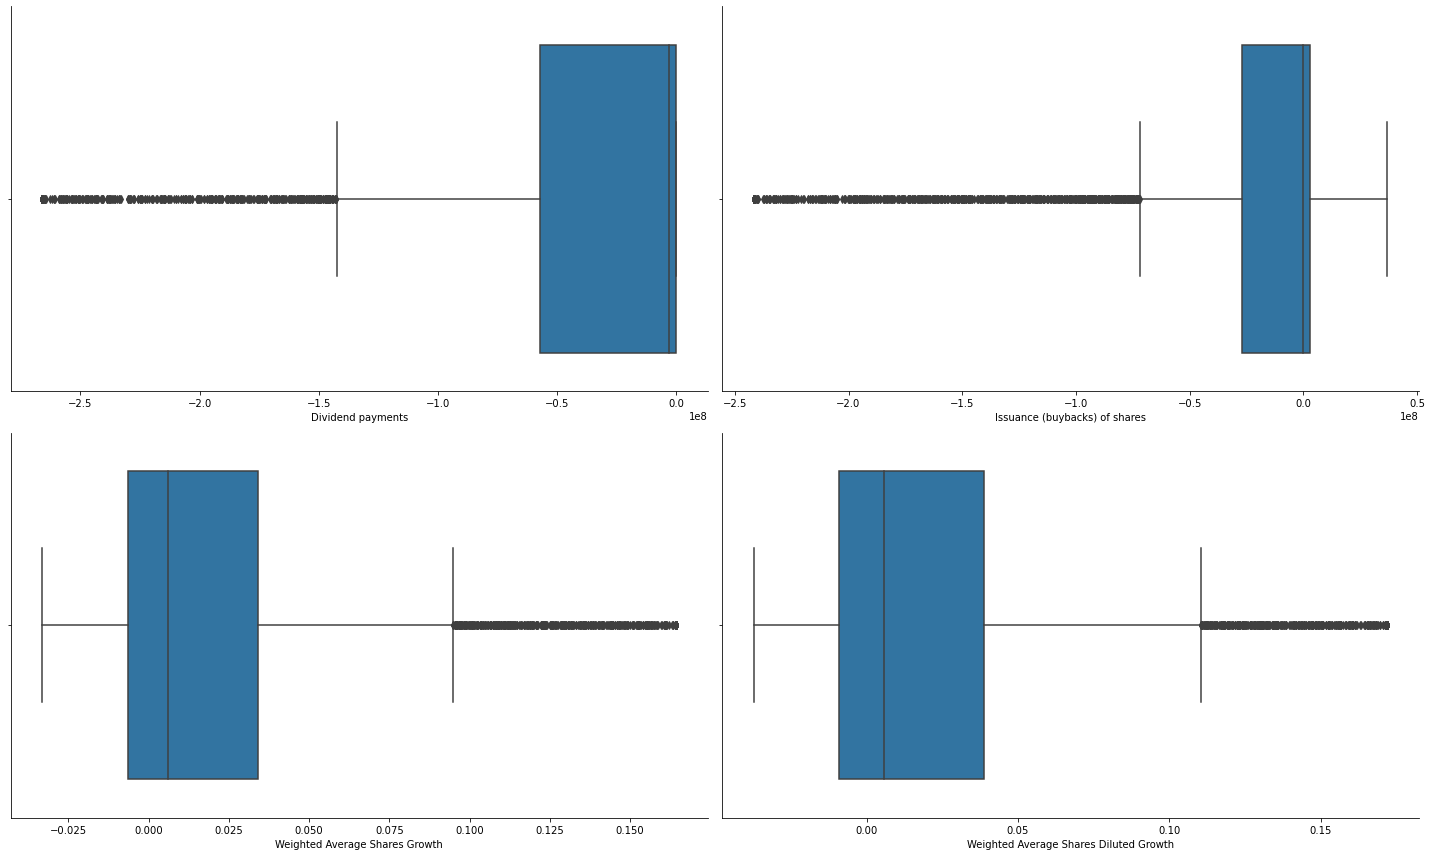

In [137]:
hig_neg_corr = list(df_winow.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow[hig_neg_corr[0]], hue="Class", data=df_winow, ax=ax0)
sns.boxplot(df_winow[hig_neg_corr[1]], hue="Class", data=df_winow, ax=ax1)
sns.boxplot(df_winow[hig_neg_corr[2]], hue="Class", data=df_winow, ax=ax2)
sns.boxplot(df_winow[hig_neg_corr[3]], hue="Class", data=df_winow, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

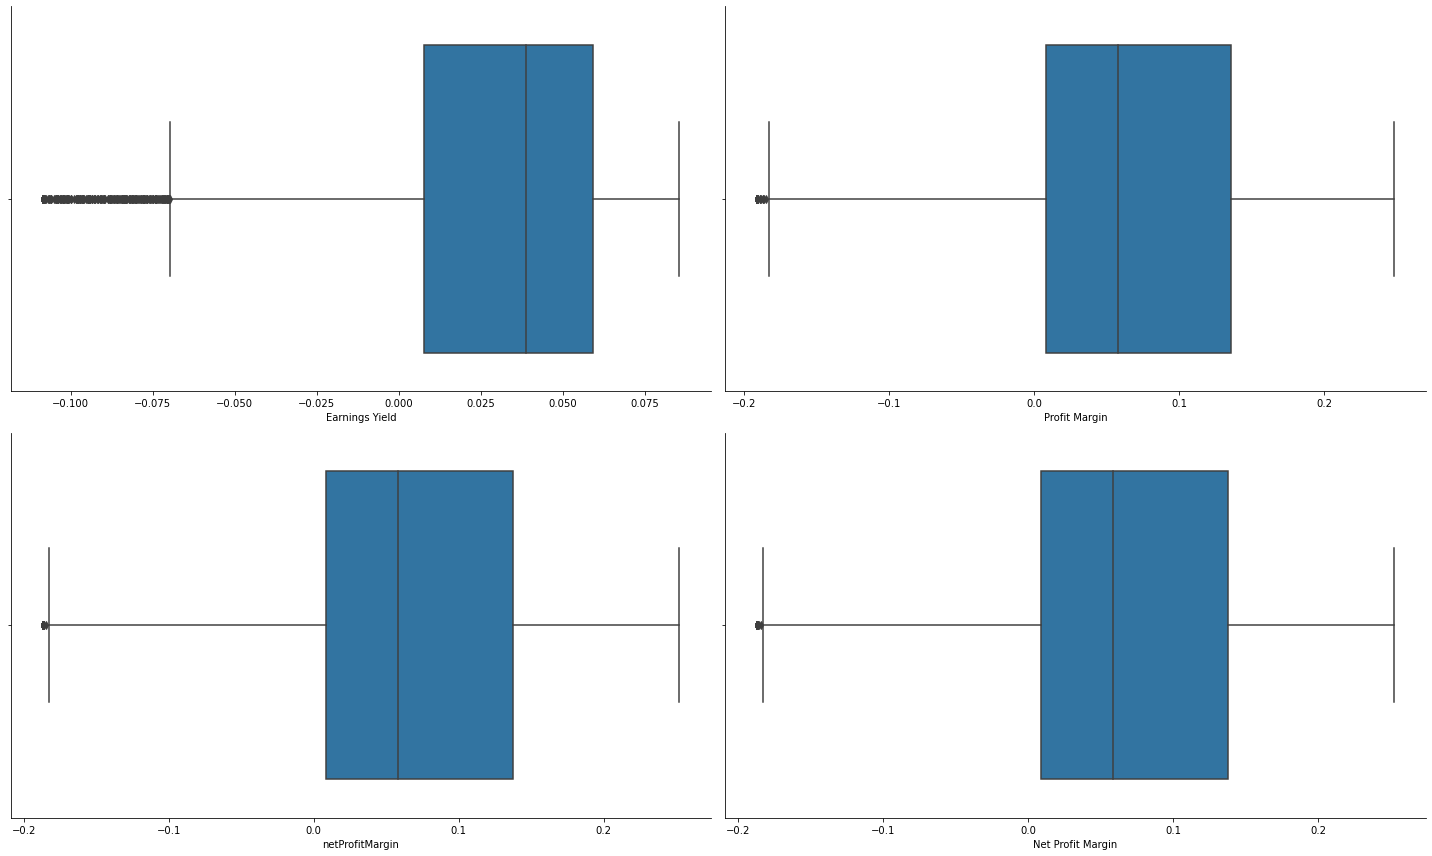

In [138]:
hig_pos_corr = list(df_winow.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow[hig_pos_corr[0]], hue="Class", data=df_winow, ax=ax0)
sns.boxplot(df_winow[hig_pos_corr[1]], hue="Class", data=df_winow, ax=ax1)
sns.boxplot(df_winow[hig_pos_corr[2]], hue="Class", data=df_winow, ax=ax2)
sns.boxplot(df_winow[hig_pos_corr[3]], hue="Class", data=df_winow, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

## 15 percentile - 85 percentile

In [139]:
df_winow2 = pd.DataFrame()
for col in df:
    if(col not in sector_list):
        df_winow2[col] = winsorize(df[col], (0.15, 0.15))
    if(col in sector_list):
        df_winow2[col] = df[col].values

In [140]:
df_winow2.shape

(7870, 181)

[]

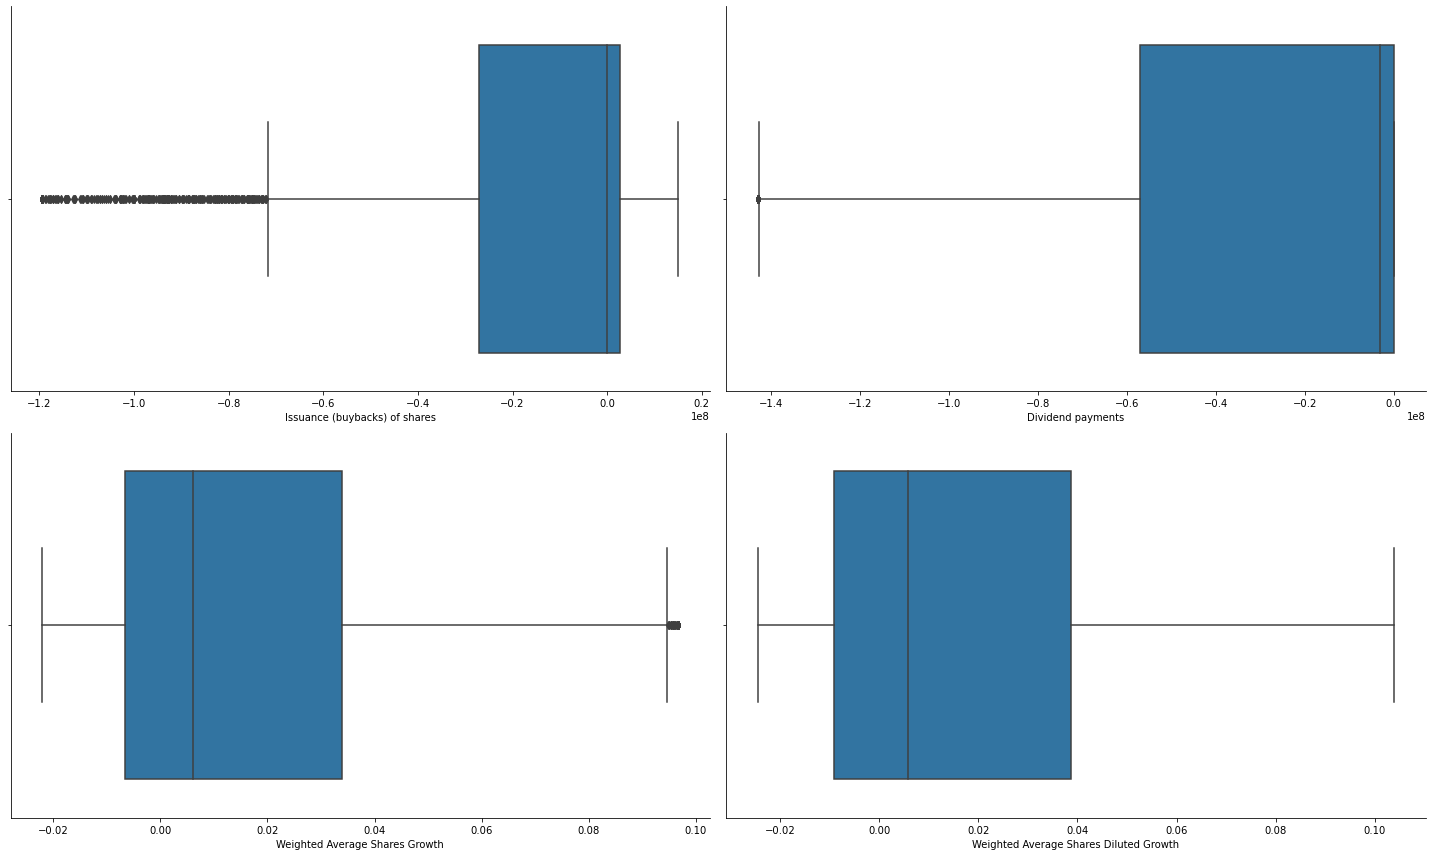

In [141]:
hig_neg_corr = list(df_winow2.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow2[hig_neg_corr[0]], hue="Class", data=df_winow2, ax=ax0)
sns.boxplot(df_winow2[hig_neg_corr[1]], hue="Class", data=df_winow2, ax=ax1)
sns.boxplot(df_winow2[hig_neg_corr[2]], hue="Class", data=df_winow2, ax=ax2)
sns.boxplot(df_winow2[hig_neg_corr[3]], hue="Class", data=df_winow2, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

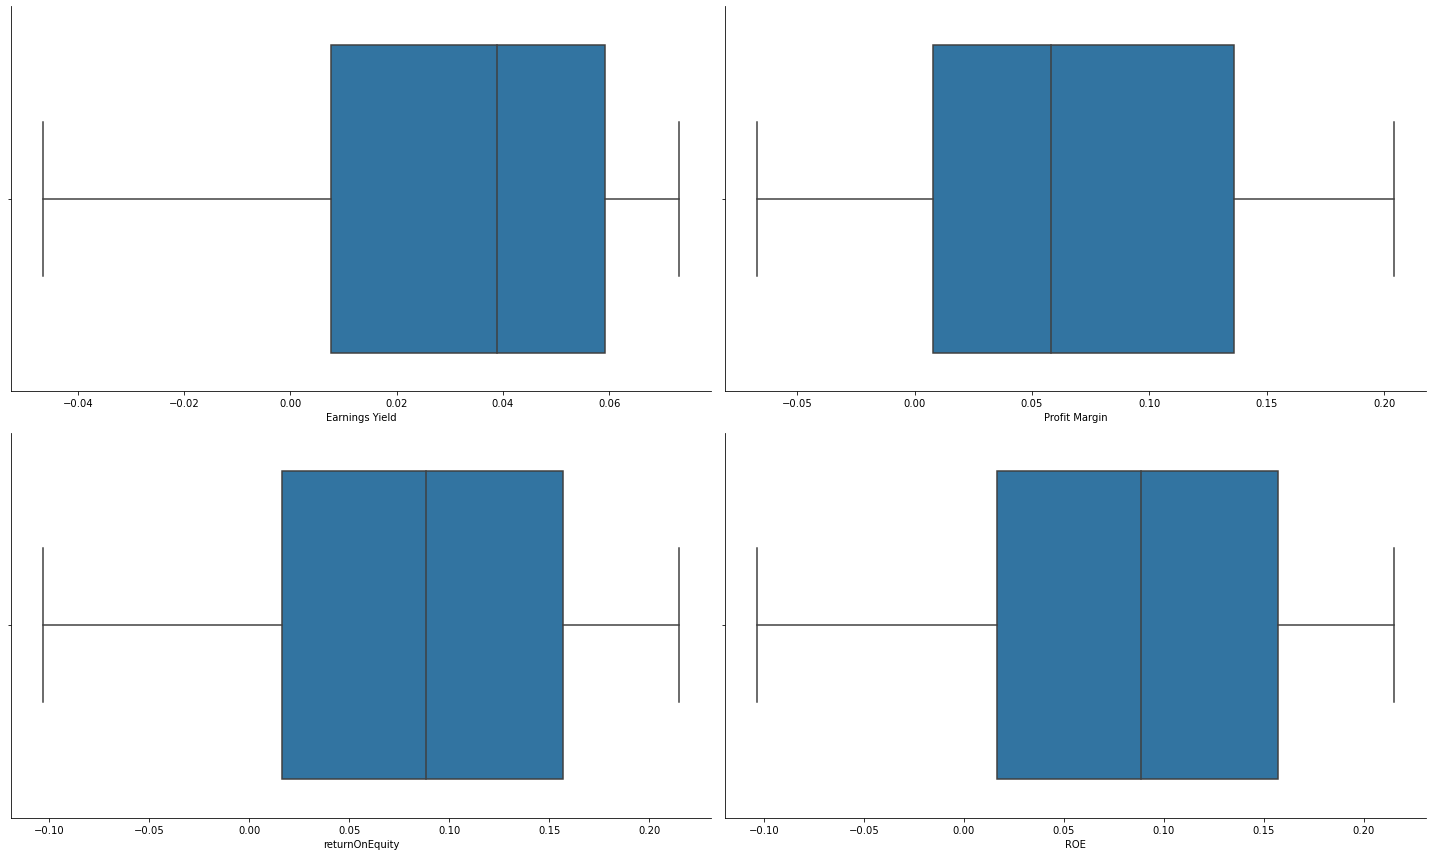

In [142]:
hig_pos_corr = list(df_winow2.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow2[hig_pos_corr[0]], hue="Class", data=df_winow2, ax=ax0)
sns.boxplot(df_winow2[hig_pos_corr[1]], hue="Class", data=df_winow2, ax=ax1)
sns.boxplot(df_winow2[hig_pos_corr[2]], hue="Class", data=df_winow2, ax=ax2)
sns.boxplot(df_winow2[hig_pos_corr[3]], hue="Class", data=df_winow2, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [143]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.15) #Removing both constant and quasi-constant
var_thr.fit(df_winow2)

var_thr.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False,

In [144]:
concol = [column for column in df_winow2.columns 
          if column not in df_winow2.columns[var_thr.get_support()]]

for features in concol:
    print(features)


Revenue Growth
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
Earnings Before Tax Margin
Net Profit Margin
Net Cash/Marketcap
dividendYield
ebitperRevenue
grossProfitMargin
pretaxProfitMargin
netProfitMargin
returnOnEquity
eBITperRevenue
debtRatio
longtermDebtToCapitalization
totalDebtToCapitalization
payoutRatio
operatingCashFlowSalesRatio
Earnings Yield
Free Cash Flow Yield
Debt to Assets
Dividend Yield
Payout Ratio
SG&A to Revenue
Intangibles to Total Assets
Capex to Operating Cash Flow
Capex to Revenue
Stock-based compensation to Revenue
ROE
Gross Profit Growth
EBIT Growth
Operating Income Growth
Weighted Average Shares Growth
Weighted Average Shares Diluted Growth
Operating Cash Flow growth
3Y Revenue Growth (per Share)
3Y Operating CF Growth (per Share)
3Y Net Income Growth (per Share)
3Y Shareholders Equity Growth (per Share)
Receivables growth
Inventory Growth
Asset Growth
Book Value per Share Growth
Debt Growth
SG&A Expenses Growth
Communication Ser

In [145]:
len(concol)

58

In [146]:
df_winow2.shape

(7870, 181)

In [147]:
# df_winow2.drop(concol, axis=1, inplace=True)

# Observation

We get a balanced data with Winsorize 15-85

In [148]:
df = df_winow2

## Train Test Split

In [149]:
my_cv = 5

In [150]:
X = df.drop('Class', axis = 1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6296, 180)
(6296, 1)
(1574, 180)
(1574, 1)


In [151]:
y_train_reshape = pd.DataFrame(y_train.values.reshape(-1,1))
print("Counts of label '1': {}".format((y_train_reshape==1).sum()[0]))
print("Counts of label '0': {} \n".format((y_train_reshape==0).sum()[0]))

y_train_1 = (y_train_reshape==1).sum()[0]
print("Percentage of Profitable Company : {}% \n".format(round(y_train_1/len(y_train_reshape)*100,2)))

Counts of label '1': 3759
Counts of label '0': 2537 

Percentage of Profitable Company : 59.7% 



# Scalers

In [152]:
#Importing the PCA module

pca = PCA(random_state=42)
pca_again = PCA(0.95)

## MinMax Scaler

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [154]:
scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
X_train_pca_mm = pca_again.fit_transform(X_train)

In [156]:
X_train_pca_mm.shape

(6296, 61)

In [157]:
# Tranforming X_Test
X_test_pca_mm = pca_again.transform(X_test)
X_test_pca_mm.shape

(1574, 61)

In [158]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

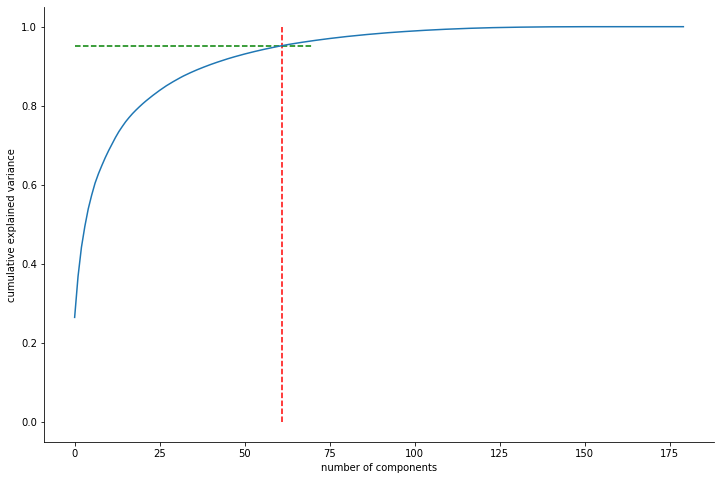

In [159]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_mm.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [160]:
pca = PCA(n_components=5)

In [161]:
scaler = MinMaxScaler()

In [162]:
scaled_df=df_winow2.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
pca_fit = pca.fit(scaled_df)

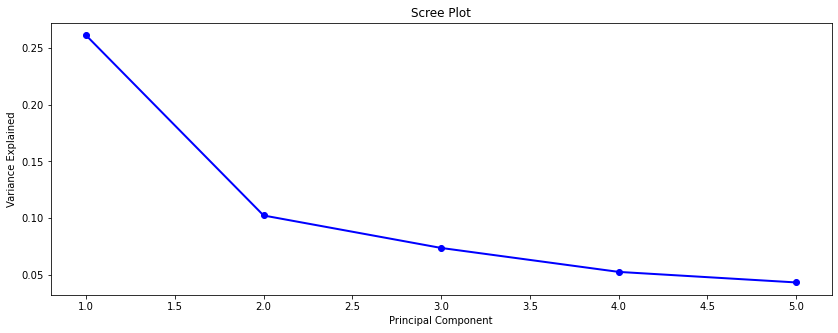

In [163]:
fig = plt.figure(figsize=(14,5))
PC_values = np.arange(pca_fit.n_components_) + 1

plt.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

In [164]:
print(pca_fit.explained_variance_ratio_)

[0.26099645 0.10230667 0.07370929 0.05261995 0.04332843]


## StandardScaler

In [165]:
#Importing the PCA module

pca = PCA(random_state=42)
pca_again = PCA(0.95)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [167]:
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
X_train_pca_std = pca_again.fit_transform(X_train)

In [169]:
X_train_pca_std.shape

(6296, 62)

In [170]:
# Tranforming X_Test
X_test_pca_std = pca_again.transform(X_test)
X_test_pca_std.shape

(1574, 62)

In [171]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

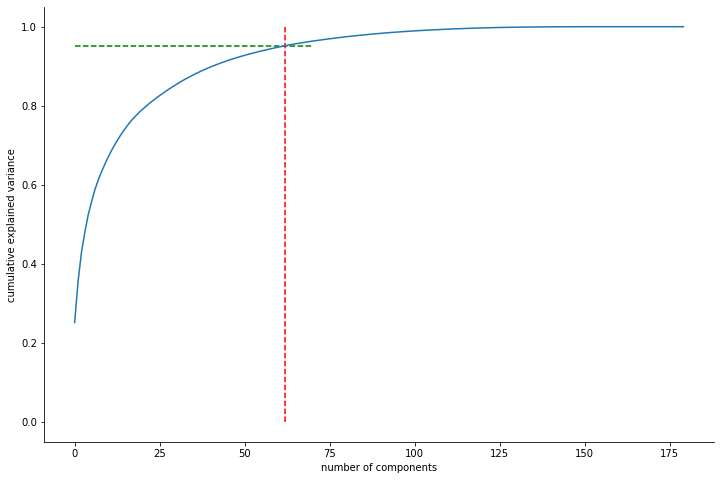

In [172]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_std.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [173]:
pca = PCA(n_components=5)

In [174]:
scaler = StandardScaler()

In [175]:
scaled_df=df_winow2.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
pca_fit = pca.fit(scaled_df)

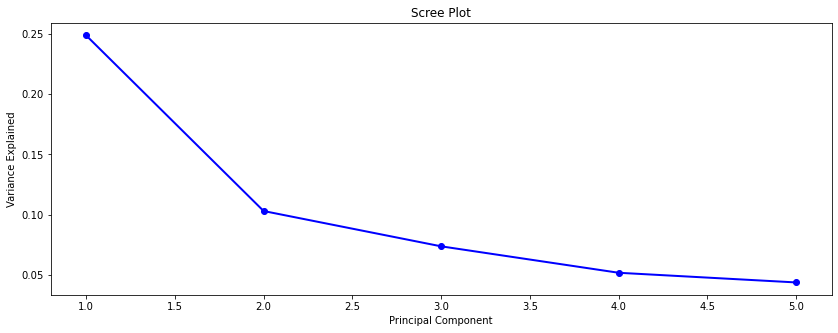

In [176]:
fig = plt.figure(figsize=(14,5))
PC_values = np.arange(pca_fit.n_components_) + 1

plt.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

In [177]:
print(pca_fit.explained_variance_ratio_)

[0.24890627 0.10296763 0.07363516 0.05167201 0.04363677]


# Data Preparation for Modelling

In [178]:
X = df_winow2.drop('Class', axis = 1)
y = df_winow2[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6296, 180)
(6296, 1)
(1574, 180)
(1574, 1)


In [179]:
# Normalize the data 

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [180]:
print("Before OverSampling, counts of label '1': {}".format((y_train==1).sum()[0]))
print("Before OverSampling, counts of label '0': {} \n".format((y_train==0).sum()[0]))

y_train_1 = (y_train==1).sum()[0]
print("Before OverSampling, churn event rate : {}% \n".format(round(y_train_1/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 3760
Before OverSampling, counts of label '0': 2536 

Before OverSampling, churn event rate : 59.72% 



In [181]:
sm_smot = smot(random_state=27, sampling_strategy=1)
X_train_res, y_train_res = sm_smot.fit_resample(X_train, y_train)
X_train_res = X_train
y_train_res = y_train

# Defining functions for Modelling

In [182]:
# Defining the function to plot the ROC Curve

def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)"%auc_score)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charactersitc example")
    plt.legend(loc="lower right")
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, thresholds

In [183]:
metricsdataframe=pd.DataFrame(columns=['Model',
                                       'Train/Test',
                                       'Roc_auc_score',
                                       'Sensitivity',
                                       'Specificity',
                                      'FPR',
                                      'Positive predictive value',
                                      'Negative Predictive value',
                                      'Precision',
                                      'Accuracy',
                                      'F1-Score'])

In [184]:
# Defining function to get the evaluation metrics of the models.
def getModelMetrics(actual_Class=False,pred_Class=False,model_name='',train_or_test=''):

    confusion = metrics.confusion_matrix(actual_Class, pred_Class)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    

    
    Roc_auc_score=round(metrics.roc_auc_score(actual_Class,pred_Class),2)
    # Let's see the sensitivity of our logistic regression model
    Sensitivity=round((TP / float(TP+FN)),2)
    # Let us calculate specificity
    Specificity=round((TN / float(TN+FP)),2)
    # Calculate false postive rate - predicting profit when customer does not have profitted
    FPR=round((FP/ float(TN+FP)),2)
    # positive predictive value 
    PositivePredictiveValue=round((TP / float(TP+FP)),2)
    # Negative predictive value
    NegativePredictiveValue=round((TN / float(TN+ FN)),2)
    # sklearn precision score value 
    Precision=round(metrics.precision_score(actual_Class, pred_Class ),2)
    # Accuracy
    Accuracy = round(metrics.accuracy_score(actual_Class, pred_Class), 2)
    # F-1 Score
    F1_Score = round(metrics.f1_score(actual_Class, pred_Class), 2)
    
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_Class,pred_Class)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting profit when customer does not have profitted
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('Precision: {}'.format(metrics.precision_score(actual_Class, pred_Class )))
    # sklearn precision score value 
    print('Accuracy: {}'.format(metrics.accuracy_score(actual_Class, pred_Class )))
    #F1 Score
    print("F1 Score: {}".format(metrics.f1_score(actual_Class, pred_Class )))
    
#     data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,NegativePredictiveValue,Precision, ]
    data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,FPR,PositivePredictiveValue,NegativePredictiveValue,Precision, Accuracy, F1_Score]
    series_metrics=pd.Series(data_list,index=metricsdataframe.columns)
    
    return series_metrics
    

In [185]:
# Defining function to write the evaluation metrics of the models into data frame.
def WriteModelMetrics(series_metrics,metricsdataframe):
    metricsdataframe = metricsdataframe.append(series_metrics,ignore_index=True)
    return metricsdataframe

In [186]:
# Function to find the optimal cutoff for classifing as Profit/non-profit
def findOptimalCutoff(df):
    
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.Class_Prob.map( lambda x: 1 if x > i else 0)
        
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for i in num:
        cm1 = metrics.confusion_matrix(df.Class, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    sns.despine()
    plt.show()

In [187]:
# Calculating VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to give VIF value 
def vif_cal(X):     
    vif = pd.DataFrame() 
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [188]:
# This method will result in the calculation of predicted value of the Class column.
def predictClassWithProb(model,X,y,prob,model_name='',train_or_test=''):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'Class':y.Class, 'Class_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Class_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.Class_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    series_metrics=getModelMetrics(y_df.Class,y_df.final_predicted,model_name,train_or_test)
    return y_df,series_metrics

In [189]:
# This method will perform cross-validation and the display the model report.
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=my_cv):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='accuracy')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.3g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.3g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.3g | Std - %.3g | Min - %.3g | Max - %.3g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [190]:
# This method will plot accuracy of the model with the given param of model.
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

In [191]:
# This method will plot accuracy of the random forest model.
def random_forst_feature_graph(grid_search, param):
    scores = grid_search.cv_results_
    plt.figure(figsize=(8,8))
    
    param = "param_"+param
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training accuracy")

    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test accuracy")

    plt.xlabel(param)
    plt.ylabel("F1")
    plt.legend()

    plt.tight_layout()
    sns.despine()
    plt.show()

# Modelling

In [192]:
X_train = X_train_pca_mm
X_test = X_test_pca_mm


In [193]:
X_train_pca = X_train
y_train_res = y_train
X_test_pca = X_test
# y_test = y_test

y_train_res=y_train_res.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

In [194]:
X_train_pca.shape

(6296, 61)

In [195]:
y_train_res.shape

(6296, 1)

In [196]:
X_test_pca.shape

(1574, 61)

In [197]:
y_test.shape

(1574, 1)

In [198]:
y_train_res = pd.DataFrame(y_train_res)

In [199]:
y_train_res.rename(columns={0:"Class"}, inplace=True)

In [200]:
y_train_res

,Class
0,1
1,0
2,1
3,0
4,0
...,...
6291,1
6292,1
6293,0
6294,1


In [201]:
y_test 

,Class
5004,0
5570,1
4489,0
5599,1
1570,0
...,...
131,1
2511,0
6850,0
6856,0


# 1. Logistic Regression

In [202]:
# Creating Train-Test variables for Logistic Regression
X_train_lr = pd.DataFrame(X_train_pca)
y_train_lr = pd.DataFrame(y_train_res)
X_test_lr = pd.DataFrame(X_test_pca)
y_test_lr = y_test

In [203]:
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 6296
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4217.1
Date:                Mon, 22 Nov 2021   Deviance:                       8434.2
Time:                        22:13:32   Pearson chi2:                 6.30e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3974      0.026     15.387      0.000       0.347       0.448
0              0.0030      0.011      0.285      0.776      -0.018       0.024
1             -0.0021      0.017     -0.125      0.901      -0.036       0.031
2              0.0280      0.020      1.383      0.167      -0.012       0.068
3              0.0375      0.024      1.571      0.116      -0.009       0.084
4              0.0402      0.026      1.536      0.125      -0.011       0.091
5             -0.0092      0.030     -0.310      0.756      -0.067       0.049
6             -0.0189      0.031     -0.604      0.546      -0.080       0.043
7              0.0204      0.035      0.576      0.565      -0.049       0.090
8              0.0066      0.038      0.174      0.862      -0.068       0.081
9             -0.0440      0.039     -1.126      0.260      -0.121       0.033
10            -0.0582      0.041     -1.425      0.154      -0.138       0.022
11            -0.0091      0.042     -0.216      0.829      -0.092       0.074
12             0.0196      0.043      0.455      0.649      -0.065       0.104
13             0.0531      0.045      1.181      0.238      -0.035       0.141
14            -0.0831      0.048     -1.720      0.085      -0.178       0.012
15             0.0337      0.050      0.679      0.497      -0.064       0.131
16            -0.0286      0.053     -0.536      0.592      -0.133       0.076
17             0.0362      0.055      0.653      0.514      -0.072       0.145
18            -0.0003      0.058     -0.006      0.996      -0.115       0.114
19             0.0450      0.060      0.746      0.455      -0.073       0.163
20            -0.0542      0.062     -0.881      0.378      -0.175       0.066
21             0.0255      0.064      0.400      0.689      -0.099       0.150
22             0.0679      0.066      1.037      0.300      -0.061       0.196
23             0.0736      0.067      1.105      0.269      -0.057       0.204
24            -0.0656      0.068     -0.969      0.332      -0.198       0.067
25            -0.0257      0.070     -0.370      0.711      -0.162       0.111
26            -0.0063      0.071     -0.089      0.929      -0.145       0.132
27            -0.0391      0.072     -0.540      0.589      -0.181       0.103
28             0.0945      0.076      1.248      0.212      -0.054       0.243
29             0.1206      0.077      1.570      0.116      -0.030       0.271
30             0.0826      0.079      1.046      0.296      -0.072       0.237
31             0.0752      0.079      0.950      0.342      -0.080       0.230
32            -0.0396      0.081     -0.487      0.626      -0.199       0.120
33             0.1946      0.085      2.294      0.022       0.028       0.361
34             0.1159      0.087      1.329      0.184      -0.055       0.287
35

In [204]:
# Checking for the VIF of the train data.
vif = vif_cal(X_train_lr) 
vif

,Features,VIF
0,0,1.0
31,31,1.0
33,33,1.0
34,34,1.0
35,35,1.0
...,...,...
25,25,1.0
26,26,1.0
27,27,1.0
28,28,1.0


### Observation
- There are no Columns which are highly correlated ---> VIF = 1
- There are not many columns whose coefficients are not statistically significant ----> p>0.05

In [205]:
lg = LogisticRegression()

In [206]:
modelfit(lg, X_train_lr, y_train_lr)


Model Report
Accuracy : 0.505
Recall/Sensitivity : 0.987
AUC Score (Train): 0.551256
CV Score : Mean - 0.591 | Std - 0.00622 | Min - 0.583 | Max - 0.6


In [207]:
# predictions on Test data
pred_probs_test = lg.predict(X_test_lr)
getModelMetrics(y_test_lr,pred_probs_test)

Roc_auc_score : 0.5017786428619371
Sensitivity/Recall : 0.9893617021276596
Specificity: 0.014195583596214511
False Positive Rate: 0.9858044164037855
Positive predictive value: 0.5980707395498392
Negative Predictive value: 0.47368421052631576
Precision: 0.5980707395498392
Accuracy: 0.5965692503176621
F1 Score: 0.7454909819639279


Model                            
Train/Test                       
Roc_auc_score                 0.5
Sensitivity                  0.99
Specificity                  0.01
FPR                          0.99
Positive predictive value     0.6
Negative Predictive value    0.47
Precision                     0.6
Accuracy                      0.6
F1-Score                     0.75
dtype: object

In [208]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test_lr,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test_lr,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test_lr,pred_probs_test)))

Accuracy : 0.5965692503176621
Recall : 0.9893617021276596
Precision : 0.5980707395498392


In [209]:
print(metrics.confusion_matrix(y_test_lr,pred_probs_test))

[[  9 625]
 [ 10 930]]


In [210]:
#Making prediction on the test data
pred_probs_train = lg.predict_proba(X_train_lr)[:,1]

print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_lr, pred_probs_train)))

roc_auc_score(Train) 0.55


In [211]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob)


Roc_auc_score : 0.5054466742734411
Sensitivity/Recall : 0.9872340425531915
Specificity: 0.02365930599369085
False Positive Rate: 0.9763406940063092
Positive predictive value: 0.5998707175177763
Negative Predictive value: 0.5555555555555556
Precision: 0.5998707175177763
Accuracy: 0.5991105463786531
F1 Score: 0.7462806594290309


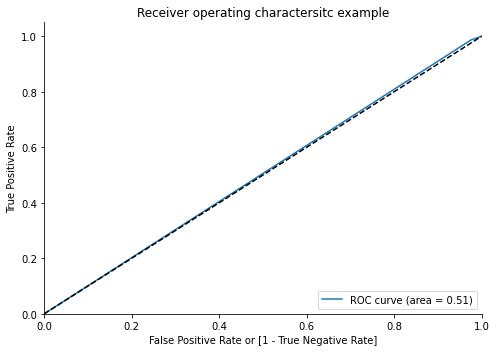

roc_auc_score : 0.51


In [212]:
draw_roc(y_train_df.Class, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

In [213]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

roc_auc_score : 0.51


     prob  accuracy     sensi     speci
0.0   0.0  0.597205  1.000000  0.000000
0.1   0.1  0.597205  1.000000  0.000000
0.2   0.2  0.597205  1.000000  0.000000
0.3   0.3  0.597205  1.000000  0.000000
0.4   0.4  0.597205  1.000000  0.000000
0.5   0.5  0.599111  0.987234  0.023659
0.6   0.6  0.534149  0.511702  0.567429
0.7   0.7  0.410102  0.016489  0.993691
0.8   0.8  0.402795  0.000000  1.000000
0.9   0.9  0.402795  0.000000  1.000000


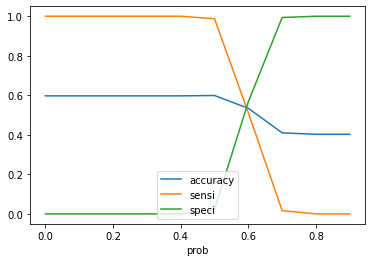

<Figure size 504x360 with 0 Axes>

In [214]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [215]:
# predicting with the choosen cut-off on TRAIN
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5054466742734411
Sensitivity/Recall : 0.9872340425531915
Specificity: 0.02365930599369085
False Positive Rate: 0.9763406940063092
Positive predictive value: 0.5998707175177763
Negative Predictive value: 0.5555555555555556
Precision: 0.5998707175177763
Accuracy: 0.5991105463786531
F1 Score: 0.7462806594290309


In [216]:
### predicting with the choosen cut-off on TEST
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_test_lr,y_test_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5017786428619371
Sensitivity/Recall : 0.9893617021276596
Specificity: 0.014195583596214511
False Positive Rate: 0.9858044164037855
Positive predictive value: 0.5980707395498392
Negative Predictive value: 0.47368421052631576
Precision: 0.5980707395498392
Accuracy: 0.5965692503176621
F1 Score: 0.7454909819639279


#### 

## 2. Decision Tree

In [217]:
# Creating Train-Test variables for Decision Tree
X_train_dt = pd.DataFrame(X_train_pca)
y_train_dt = pd.DataFrame(y_train_res)
X_test_dt = pd.DataFrame(X_test_pca)
y_test_dt = y_test

In [218]:
X_train_dt.shape

(6296, 61)

In [219]:
y_train_dt.shape

(6296, 1)

In [220]:
X_test_dt.shape, y_test_dt.shape

((1574, 61), (1574, 1))

In [221]:
##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=123)

modelfit(dt, X_train_dt, y_train_dt)


Model Report
Accuracy : 0.593
Recall/Sensitivity : 0.587
AUC Score (Train): 0.629075
CV Score : Mean - 0.501 | Std - 0.014 | Min - 0.479 | Max - 0.518


In [222]:
# make predictions
pred_probs_test = dt.predict(X_test_dt)

#Let's check the model metrices.

getModelMetrics(y_test_dt,pred_probs_test)

Roc_auc_score : 0.5003674743271361
Sensitivity/Recall : 0.5180851063829788
Specificity: 0.48264984227129337
False Positive Rate: 0.5173501577287066
Positive predictive value: 0.5975460122699386
Negative Predictive value: 0.4031620553359684
Precision: 0.5975460122699386
Accuracy: 0.5038119440914867
F1 Score: 0.554985754985755


Model                            
Train/Test                       
Roc_auc_score                 0.5
Sensitivity                  0.52
Specificity                  0.48
FPR                          0.52
Positive predictive value     0.6
Negative Predictive value     0.4
Precision                     0.6
Accuracy                      0.5
F1-Score                     0.55
dtype: object

In [223]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20,30,50],
    'min_samples_leaf': range(100, 500, 50),
    'min_samples_split': range(100, 500, 50),
    'max_features': [5,10,15,20,30,50]
}
# Create a base model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=123)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = my_cv, n_jobs = -1,verbose = 1000,scoring="f1_weighted")

In [224]:
# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed

[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    4.2s
[Paralle

[CV]  max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=200, score=0.464, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=250 
[CV]  max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=250, score=0.515, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=350 
[CV]  max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=350, score=0.517, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=350 
[CV]  max_depth=5, max_features=5, min_samples_leaf=150, min_samples_split=350, score=0.516, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=200, min_samples_split=100 
[CV]  max_depth=5, max_features=5, min_samples_leaf=200, min_samples_split=100, score=0.444, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=5, max_features=5, min_samples_leaf=200, min_samples_s

[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:    7.4s
[CV] max_depth=5, max_features=5, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=5, max_features=5, min_samples_leaf=100, min_samples_split=150, score=0.516, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=100, min_samples_split=300 
[CV]  max_depth=5, max_features=5, min_samples_leaf=100, min_samples_split=300, score=0.504, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=100, min_samples_split=400 
[CV]  max_depth=5, max_features=5, min_sample

[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1104 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1192 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0410s.) Setting batch_size=1.
[CV]  max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=300, score=0.458, total=   0.1s
[CV] max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=300, score=0.473, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=300, score=0.482, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=150, score=0.442, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=150, score=0.515, total=  

[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1760 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   15.7s
[CV] max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=450, score=0.431, total=   0.1s
[CV] max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=450, score=0.507, total=   0.1s
[CV] max_depth=5, max_features=15, min_samples_leaf=250, min_samples_split=150 
[CV]  max_depth=5, max_features=15, min_samples_leaf=250, min_samples_split=150, score=0.484, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=250, min_samples_split=150 
[CV]  max_depth=5, max_features=15, min_s

[Parallel(n_jobs=-1)]: Done 1801 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1802 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1803 tasks      | elapsed:   16.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=400 
[CV]  max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=400, score=0.483, total=   0.1s
[CV] max_depth=5, max_features=15, min_samples_leaf=300, min_samples_split=300 
[CV]  max_depth=5, max_features=15, min_samples_leaf=300, min_samples_split=300, score=0.521, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=300, min_samples_split=350 
[CV]  max_depth=5, max_features=15, min_samples_leaf=300, min_samples_split=350, score=0.477, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=300, min_samples_split=350 
[CV]  max_depth=5, max_features=15, min_samples_leaf=300, min_samples_split=350, score=0.530, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=300, mi

[Parallel(n_jobs=-1)]: Done 1811 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1812 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1813 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1814 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1815 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1817 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 1818 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 1819 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1821 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1822 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1823 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1825 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1826 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 2004 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 2008 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 2012 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2020 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2036 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2048 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 2056 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed: 

[CV] max_depth=5, max_features=50, min_samples_leaf=350, min_samples_split=300 
[CV]  max_depth=5, max_features=50, min_samples_leaf=350, min_samples_split=300, score=0.477, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=350, min_samples_split=350 
[CV]  max_depth=5, max_features=50, min_samples_leaf=350, min_samples_split=350, score=0.497, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=350, min_samples_split=400 
[CV]  max_depth=5, max_features=50, min_samples_leaf=350, min_samples_split=400, score=0.497, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=400, min_samples_split=100 
[CV]  max_depth=5, max_features=50, min_samples_leaf=400, min_samples_split=100, score=0.483, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=400, min_samples_split=150 
[CV]  max_depth=5, max_features=50, min_samples_leaf=400, min_samples_split=150, score=0.477, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=400, min

[CV]  max_depth=5, max_features=[Parallel(n_jobs=-1)]: Done 2480 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:   20.5s
50, min_samples_leaf=100, min_samples_split=400, score=0.449, total=   0.2s
[CV] max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=150, score=0.480, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=150, score=0.496, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=200 
[CV]  max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=200, score=0.500, total=   0.1s
[CV] max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=200 
[CV]  max_depth=5, max_features=50, min_samples_leaf=200, min_samples_split=200, score=0.455, total=   0.2s
[CV] max_depth

[CV] max_depth=10, max_features=5, min_samples_l[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:   20.7s
eaf=150, min_samples_split=300 
[CV]  max_depth=10, max_features=5, min_samples_leaf=150, min_samples_split=300, score=0.519, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=10, max_features=5, min_samples_leaf=150, min_samples_split=300, score=0.488, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=10, max_features=5, min_samples_leaf=200, min_samples_split=300, score=0.520, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=10, max_features=5, min_samples_leaf=200, min_samples_split=300, score=0.507, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=10, max_features=5, min_samples_leaf=200, min_samples_split=300, score=0.533, total=   0.

[CV]  max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=150, score=0.505, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200 
[CV]  max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200, score=0.479, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200 
[CV]  max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200, score=0.502, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200 
[CV]  max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200, score=0.531, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200 
[CV]  max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200, score=0.506, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=300, min_samples_split=200 
[CV]  max_depth=10, max_features=5, min_samples_leaf=300, mi

[CV]  max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450, score=0.520, total=   0.1s
[CV] max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450 
[CV]  max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450, score=0.496, total=   0.0s
[CV] max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450 
[CV]  max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450, score=0.508, total=   0.0s
[CV] max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450 
[CV]  max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450, score=0.514, total=   0.0s
[CV] max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450 
[CV]  max_depth=10, max_features=10, min_samples_leaf=400, min_samples_split=450, score=0.492, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=250 
[CV]  max_depth=10, max_features=15, min_samples_l

[CV] max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250 
[CV]  max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250, score=0.514, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250 
[CV]  max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250, score=0.485, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250 
[CV]  max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250, score=0.526, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250 
[CV]  max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=250, score=0.460, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=300 
[CV]  max_depth=10, max_features=5, min_samples_leaf=450, min_samples_split=300, score=0.466, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=450, min

[CV]  max_depth=10, max_features=5, min_samples_leaf=400, min_samples_split=400, score=0.524, total=   0.0s
[CV] max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=150, score=0.512, total=   0.1s
[CV] max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=150, score=0.503, total=   0.1s
[CV] max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=200, score=0.491, total=   0.1s
[CV] max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=200, score=0.504, total=   0.1s
[CV] max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=10, max_features=10, min_samples_le

[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 3240 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 3248 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 3256 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 3264 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 3280 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 3288 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 3296 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 3304 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 3312 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 3320 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 3328 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3742 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3743 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3744 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3745 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3746 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3747 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3748 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3749 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3750 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3751 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 3752 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 3753 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 3754 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 3755 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 3756 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 3757 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3781 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 3782 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 3783 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 3784 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 3785 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 3786 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3787 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3788 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3789 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3790 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3791 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3792 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3793 tasks      | elapsed:   34.9s
[CV]  max_depth=10, max_features=15, min_samples_leaf=400, min_samples_split=150, score=0.519, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=400, min_samples_sp

[Parallel(n_jobs=-1)]: Done 3797 tasks      | elapsed:   35.0s
[CV]  max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=400, score=0.488, total=   0.1s
[CV] max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=400 
[CV]  max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=400, score=0.492, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=400 
[CV]  max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=400, score=0.523, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=450 
[CV]  max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=450, score=0.533, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=450 
[CV]  max_depth=10, max_features=15, min_samples_leaf=350, min_samples_split=450, score=0.485, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=350, min_sample

[Parallel(n_jobs=-1)]: Done 3813 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 3814 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3815 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3816 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3817 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3818 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3819 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3820 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3821 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 3822 tasks      | elapsed:   35.4s
=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=400, min_samples_split=350 
[CV]  max_depth=10, max_features=15, min_samples_leaf=400, min_samples_split=350, score=0.519, total=   0.0s
[CV] max_depth=10, max_features=15, min_samples_leaf=400, min_samples_split=400 
[CV]  max_depth=10, max_features=15, min_samples_leaf=400, min_samples_split=400, score=0.

[Parallel(n_jobs=-1)]: Done 3829 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 3830 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3831 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3832 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3833 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3834 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3835 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3836 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3837 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 3838 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 3839 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1912s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 3841 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 3842 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 3843 ta

[Parallel(n_jobs=-1)]: Done 3920 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 3924 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3928 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3932 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3936 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3940 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3944 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3948 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3952 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3960 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 3968 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 3976 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 4432 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 4440 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 4448 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 4456 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 4464 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 4472 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 4480 tasks      | elapsed:   38.2s
[CV]  max_depth=10, max_features=30, min_samples_leaf=350, min_samples_split=250, score=0.501, total=   0.1s
[CV] max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=100 
[CV]  max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=100, score=0.502, total=   0.1s
[CV] max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=100 
[CV]  max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=100, score=0.473, total=   0.1s
[CV] ma

[CV] max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=250 
[CV]  max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=250, score=0.466, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=400, score=0.518, total=   0.1s
[CV] max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=400, score=0.483, total=   0.1s
[CV] max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=400, score=0.480, total=   0.1s
[CV] max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=10, max_features=30, min_samples_leaf=450, min_samples_split=450, score=0.502, total=   0.1s
[CV] max_depth=10, max_features=30, min_samples_leaf

[CV] max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=100 
[CV]  max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=100, score=0.500, total=   0.2s
[CV] max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=100 
[CV]  max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=100, score=0.479, total=   0.2s
[CV] max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=100 
[CV]  max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=100, score=0.482, total=   0.2s
[CV] max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=150, score=0.518, total=   0.2s
[CV] max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=10, max_features=50, min_samples_leaf=100, min_samples_split=150, score=0.484, total=   0.2s
[CV] max_depth=10, max_features=50, min_samples_le

[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4568 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 4616 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 4640 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 4648 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 4656 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 4664 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 4672 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 4680 tasks      | elapsed: 

[CV]  max_depth=15, max_features=5, min_samples_leaf=400, min_samples_split=150, score=0.467, total=   0.0s
[CV] max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=400, score=0.485, total=   0.0s
[CV] max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=400, score=0.526, total=   0.0s
[CV] max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=400, score=0.460, total=   0.0s
[CV] max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=450, score=0.466, total=   0.0s
[CV] max_depth=15, max_features=5, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=15, max_features=5, min_samples_leaf=450, mi

[Parallel(n_jobs=-1)]: Done 5128 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5144 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5152 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5168 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5176 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 5184 tasks      | elapsed:   44.3s
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=150, score=0.479, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=150, score=0.503, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=200, score=0.471, total=   0.0s
[CV] ma

[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450, score=0.505, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450, score=0.505, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450, score=0.521, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450, score=0.503, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=450, score=0.480, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=15, max_features=10, min_samples_l

[Parallel(n_jobs=-1)]: Done 5208 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 5216 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 5224 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 5232 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 5240 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 5248 tasks      | elapsed:   45.2s
[CV]  max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=150, score=0.493, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=150, score=0.476, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=200 
[CV]  max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=200, score=0.502, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=200 
[CV]  max_depth=15, max_features=10, min_samples_lea

[CV]  max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=400, score=0.477, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450, score=0.506, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450, score=0.497, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450, score=0.511, total=   0.1s
[CV] max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450, score=0.481, total=   0.0s
[CV] max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=15, max_features=10, min_samples_l

[CV] max_depth=15, max_features=15, min_samples_leaf=400, min[Parallel(n_jobs=-1)]: Done 5272 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 5280 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 5288 tasks      | elapsed:   45.8s
_samples_split=200 
[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=200, score=0.529, total=   0.1s
[CV] max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=200 
[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=200, score=0.471, total=   0.0s
[CV] max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=200 
[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=200, score=0.519, total=   0.0s
[CV] max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=250 
[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=250, score=0.491, total=   0.0s
[CV] max_depth=15, max_features=15, min_samples_lea

[Parallel(n_jobs=-1)]: Done 5574 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 5575 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 5576 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 5577 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 5578 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 5579 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 5587 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 5595 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 5603 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 5604 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 5612 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 5620 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 5628 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 5629 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 5630 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 5631 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5753 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 5754 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5755 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5757 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5758 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5759 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1915s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5761 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5762 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5763 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5764 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5765 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5766 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5767 ta

[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=350, score=0.519, total=   0.0s
[CV] max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=400 
[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=400, score=0.491, total=   0.1s
[CV] max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=400 
[CV]  max_depth=15, max_features=15, min_samples_leaf=400, min_samples_split=400, score=0.498, total=   0.0s
[CV] max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=400 
[CV]  max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=400, score=0.482, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=400 
[CV]  max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=400, score=0.454, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=400 
[CV]  max_depth=15, max_features=20, min_samples_l

[Parallel(n_jobs=-1)]: Done 5844 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 5848 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 5852 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 5860 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 5864 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 5868 tasks      | elapsed:   54.1s
[CV]  max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=150, score=0.534, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=150 
[CV]  max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=150, score=0.499, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=400 
[CV]  max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=400, score=0.479, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=150, min_samples_

[Parallel(n_jobs=-1)]: Done 5888 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 5896 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 5904 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 5912 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 5920 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 5928 tasks      | elapsed:   54.2s
[CV]  max_depth=15, max_features=20, min_samples_leaf=250, min_samples_split=150, score=0.509, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=250, min_samples_split=150 
[CV]  max_depth=15, max_features=20, min_samples_leaf=250, min_samples_split=150, score=0.466, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=300, min_samples_split=150 
[CV]  max_depth=15, max_features=20, min_samples_leaf=300, min_samples_split=150, score=0.507, total=   0.1s
[CV] max_depth=15, max_features=20, min_samples_leaf=300, min_samples_split=150 
[CV]  max_depth=15, max_features=20, min_samples_lea

[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 6008 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 6016 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 6024 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 6032 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 6040 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 6056 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 6064 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 6072 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 6080 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 6088 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 6096 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 6104 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 6112 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 6120 tasks      | elapsed: 

[CV]  max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250, score=0.499, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250, score=0.486, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250, score=0.487, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=250, score=0.502, total=   0.3s
[CV] max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=300 
[CV]  max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=300, score=0.503, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=100, min_samples_split=300 
[CV]  max_depth=15, max_features=50, min_samples_l

[CV] max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=150, score=0.471, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=100, score=0.516, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=100 
[CV]  max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=100, score=0.489, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=150 
[CV]  max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=150, score=0.499, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=150 
[CV]  max_depth=15, max_features=50, min_samples_leaf=150, min_samples_split=150, score=0.507, total=   0.3s
[CV] max_depth=15, max_features=50, min_samples_le

[Parallel(n_jobs=-1)]: Done 6536 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 6544 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 6552 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 6560 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 6568 tasks      | elapsed:   57.9s
[CV]  max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=100, score=0.514, total=   0.1s
[CV] max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=150, score=0.491, total=   0.1s
[CV] max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=150, score=0.513, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=150, score=0.477, total=   0.1s
[CV] m

[CV]  max_depth=15, max_features=50, min_samples_leaf=200, min_samples_split=400, score=0.513, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250, score=0.505, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250, score=0.446, total=   0.1s
[CV] max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250, score=0.476, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250 
[CV]  max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=250, score=0.462, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=250, min_samples_split=300 
[CV]  max_depth=15, max_features=50, min_samples_l

[CV] max_depth=15, max_features=50, min_samples_leaf=300,[Parallel(n_jobs=-1)]: Done 6608 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 6616 tasks      | elapsed:   58.3s
 min_samples_split=300 
[CV]  max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=300, score=0.476, total=   0.1s
[CV] max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=300 
[CV]  max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=300, score=0.461, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=300 
[CV]  max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=300, score=0.489, total=   0.1s
[CV] max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=350 
[CV]  max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=350, score=0.509, total=   0.2s
[CV] max_depth=15, max_features=50, min_samples_leaf=300, min_samples_split=350 
[CV]  max_depth=15, max_features=

[Parallel(n_jobs=-1)]: Done 6656 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 6664 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 6688 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 6696 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 6704 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 6712 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 6720 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 6728 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 6736 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 6744 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 6752 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 6768 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 6776 tasks      | elapsed: 

[CV]  max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=400, score=0.493, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=400 
[CV]  max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=400, score=0.476, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450, score=0.491, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450, score=0.523, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450, score=0.485, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=20, max_features=10, min_samples_l

[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7200 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7208 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7216 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7224 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7232 tasks      | elapsed:  1.1min
[CV]  max_depth=20, max_features=10, min_samples_leaf=300, min_samples_split=100, score=0.468, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=300, min_samples_split=150 
[CV]  max_depth=20, max_features=10, min_samples_leaf=300, min_samples_split=150, score=0.558, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=300, min_samples_split=150 
[CV]  max_depth=20, max_features=10, min_samples_leaf=300, min_samples_split=150, score=0.450, total=   0.0s
[CV] ma

[Parallel(n_jobs=-1)]: Done 7288 tasks      | elapsed:  1.1min
[CV]  max_depth=20, max_features=10, min_samples_leaf=250, min_samples_split=250, score=0.459, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100 
[CV]  max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100, score=0.484, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100 
[CV]  max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100, score=0.516, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100 
[CV]  max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100, score=0.501, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100 
[CV]  max_depth=20, max_features=10, min_samples_leaf=350, min_samples_split=100, score=0.520, total=   0.0s
[CV] max_depth=20, max_features=10, min_samples_leaf=350, min_sample

[Parallel(n_jobs=-1)]: Done 7304 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7312 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7320 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7328 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7336 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7344 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7352 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7360 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7368 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7376 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7384 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7392 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7400 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7408 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7416 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7424 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7700 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7702 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7704 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7706 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7708 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7710 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7712 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7714 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7716 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7718 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7720 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7722 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7724 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7726 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7728 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7732 tasks      | elapsed: 

[[Parallel(n_jobs=-1)]: Done 7860 tasks      | elapsed:  1.2min
CV] max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=200 
[CV]  max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=200, score=0.515, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=200 
[CV]  max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=200, score=0.473, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=200 
[CV]  max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=200, score=0.484, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=250 
[CV]  max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=250, score=0.525, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=300, score=0.481, t

[Parallel(n_jobs=-1)]: Done 7932 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7936 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7940 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7944 tasks      | elapsed:  1.2min
[CV]  max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=400, score=0.502, total=   0.0s
[CV] max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=450 
[CV]  max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=450, score=0.460, total=   0.1s
[CV] max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=450 
[CV]  max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=450, score=0.499, total=   0.1s
[CV] max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=450 
[CV]  max_depth=20, max_features=20, min_samples_leaf=300, min_samples_split=450, score=0.517, total=   0.1s
[CV] max_depth=20, max_features=20, min_samples_leaf=300, min_samples

[CV]  max_depth=20, max_features=30, min_samples_l[Parallel(n_jobs=-1)]: Done 7992 tasks      | elapsed:  1.2min
eaf=300, min_samples_split=400, score=0.511, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=150 
[CV]  max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=150, score=0.493, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=150 
[CV]  max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=150, score=0.459, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=200 
[CV]  max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=200, score=0.508, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=200 
[CV]  max_depth=20, max_features=30, min_samples_leaf=400, min_samples_split=200, score=0.458, total=   0.1s
[CV] max_depth=20, max_features=30, min_samples_leaf=400, min_sample

[Parallel(n_jobs=-1)]: Done 8040 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8048 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8056 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8064 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8072 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8080 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8096 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8104 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8152 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8160 tasks      | elapsed: 

[CV] max_depth=30, max_features=5, min_samples_leaf=400, min_samples_split=350 
[CV]  max_depth=30, max_features=5, min_samples_leaf=400, min_samples_split=350, score=0.504, total=   0.0s
[CV] max_depth=30, max_features=5, min_samples_leaf=400, min_samples_split=350 
[CV]  max_depth=30, max_features=5, min_samples_leaf=400, min_samples_split=350, score=0.524, total=   0.0s
[CV] max_depth=30, max_features=5, min_samples_leaf=400, min_samples_split=350 
[CV]  max_depth=30, max_features=5, min_samples_leaf=400, min_samples_split=350, score=0.467, total=   0.0s
[CV] max_depth=30, max_features=5, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=30, max_features=5, min_samples_leaf=450, min_samples_split=400, score=0.485, total=   0.0s
[CV] max_depth=30, max_features=5, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=30, max_features=5, min_samples_leaf=450, min_samples_split=400, score=0.526, total=   0.0s
[CV] max_depth=30, max_features=5, min_samples_leaf=450, min

[Parallel(n_jobs=-1)]: Done 8544 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8552 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8560 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8576 tasks      | elapsed:  1.3min
[CV]  max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=150, score=0.476, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=150 
[CV]  max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=150, score=0.509, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=150 
[CV]  max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=150, score=0.461, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=400 
[CV]  max_depth=20, max_features=50, min_samples_leaf=300, min_samples_split=400, score=0.461, total=   0.1s
[CV] m

[Parallel(n_jobs=-1)]: Done 8632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8640 tasks      | elapsed:  1.3min
[CV]  max_depth=20, max_features=50, min_samples_leaf=400, min_samples_split=350, score=0.483, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=400, min_samples_split=400 
[CV]  max_depth=20, max_features=50, min_samples_leaf=400, min_samples_split=400, score=0.505, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=100 
[CV]  max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=100, score=0.530, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=200 
[CV]  max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=200, score=0.517, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=250 
[CV]  max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=250, score=0.481, total=   0.1s
[CV] 

[Parallel(n_jobs=-1)]: Done 8648 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8656 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8664 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8672 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8680 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8688 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8696 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8704 tasks      | elapsed:  1.3min
[CV]  max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=100, score=0.481, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=200 
[CV]  max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=200, score=0.485, total=   0.1s
[CV] max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=300 
[CV]  max_depth=20, max_features=50, min_samples_leaf=450, min_samples_split=300, score=0.530, total=   0.1s
[CV] ma

[Parallel(n_jobs=-1)]: Done 8744 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8752 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8760 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8800 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8808 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8816 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8824 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8832 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8840 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8848 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8856 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8864 tasks      | elapsed: 

[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=250, score=0.508, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=250 
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=250, score=0.514, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=250 
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=250, score=0.492, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=300 
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=300, score=0.520, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=300 
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=300, score=0.496, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=300 
[CV]  max_depth=30, max_features=10, min_samples_l

[Parallel(n_jobs=-1)]: Done 9224 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9248 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9256 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9264 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9280 tasks      | elapsed:  1.4min
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=200, score=0.520, total=   0.1s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=200 
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=200, score=0.496, total=   0.1s
[CV] max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=200 
[CV]  max_depth=30, max_features=10, min_samples_leaf=400, min_samples_split=200, score=0.508, total=   0.0s
[CV] ma

[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450, score=0.477, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450, score=0.511, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450, score=0.508, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450, score=0.456, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450 
[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=450, score=0.503, total=   0.0s
[CV] max_depth=30, max_features=15, min_samples_leaf=150, min_samples_split=250 
[CV]  max_depth=30, max_features=15, min_samples_l

[Parallel(n_jobs=-1)]: Done 9288 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9296 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9304 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9312 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9320 tasks      | elapsed:  1.4min
[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=150, score=0.511, total=   0.0s
[CV] max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=150 
[CV]  max_depth=30, max_features=10, min_samples_leaf=450, min_samples_split=150, score=0.508, total=   0.0s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=250 
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=250, score=0.497, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=250 
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=250, score=0.524, total=   0.1s
[CV] m

[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=150, score=0.498, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200, score=0.513, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200, score=0.521, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200, score=0.511, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200, score=0.522, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200 
[CV]  max_depth=30, max_features=15, min_samples_l

[Parallel(n_jobs=-1)]: Done 9352 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1334s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 9360 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9368 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9376 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9384 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9392 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9408 tasks      | elapsed:  1.4min
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=450, score=0.513, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=30, max_features=15, min_samples_leaf=200, min_samples_split=300, score=0.487, total=   0.1s
[CV] max_depth=30, max_features=15, min_samples_leaf=200, min_samples_split=350 
[CV]  max_depth=30, max_features=

[Parallel(n_jobs=-1)]: Done 9416 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9424 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9432 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9440 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9448 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9456 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9464 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9472 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9473 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9474 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9475 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9476 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9477 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9478 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9479 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9480 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9617 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9618 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9619 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9620 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9621 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9622 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9623 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9625 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9626 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9627 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9628 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9629 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9630 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9631 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9632 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9896 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9912 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9920 tasks      | elapsed:  1.5min
max_features=30, min_samples_leaf=350, min_samples_split=150, score=0.458, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=350, min_samples_split=150 
[CV]  max_depth=30, max_features=30, min_samples_leaf=350, min_samples_split=150, score=0.498, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=400, min_samples_split=250 
[CV]  max_depth=30, max_features=30, min_samples_leaf=400, min_samples_split=250, score=0.458, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=400, min_samples_split=250 
[CV]  max_depth=30, max_features=30, min_samples_leaf=400, min_samples_split=250, score=0.514, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=400, min_samples_split=250 
[CV]  ma

[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9936 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9944 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9960 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9968 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9976 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:  1.5min
[CV]  max_depth=30, max_features=30, min_samples_leaf=100, min_samples_split=400, score=0.507, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=100, min_samples_split=400 
[CV]  max_depth=30, max_features=30, min_samples_leaf=100, min_samples_split=400, score=0.518, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=100, min_samples_split=450 
[CV]  max_depth=30, max_features=30, min_samples_leaf=100, min_samples_split=450, score=0.514, total=   0.1s
[CV] ma

[CV]  max_depth=30, max_features=30, min_samples_leaf=150, min_samples_split=150, score=0.515, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250, score=0.507, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250, score=0.528, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250, score=0.516, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=250, score=0.481, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=300 
[CV]  max_depth=30, max_features=30, min_samples_l

[CV]  max_depth=30, max_features=50, min_samples_leaf=150, min_sample[Parallel(n_jobs=-1)]: Done 10040 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10048 tasks      | elapsed:  1.5min
s_split=250, score=0.516, total=   0.2s
[CV] max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=250 
[CV]  max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=250, score=0.489, total=   0.2s
[CV] max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=300, score=0.499, total=   0.1s
[CV] max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=300, score=0.507, total=   0.2s
[CV] max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=30, max_features=50, min_samples_leaf=150, min_samples_split=300, score=0.504, total=   0.1s
[CV

[Parallel(n_jobs=-1)]: Done 10056 tasks      | elapsed:  1.5min
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=350, score=0.481, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=400 
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=400, score=0.507, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=400 
[CV]  max_depth=30, max_features=30, min_samples_leaf=200, min_samples_split=400, score=0.507, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=300, min_samples_split=100 
[CV]  max_depth=30, max_features=30, min_samples_leaf=300, min_samples_split=100, score=0.480, total=   0.2s
[CV] max_depth=30, max_features=30, min_samples_leaf=300, min_samples_split=100 
[CV]  max_depth=30, max_features=30, min_samples_leaf=300, min_samples_split=100, score=0.511, total=   0.1s
[CV] max_depth=30, max_features=30, min_samples_leaf=300, min_sampl

[Parallel(n_jobs=-1)]: Done 10120 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10128 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10136 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10152 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10160 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10168 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10200 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10208 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10216 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10224 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10232 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10240 tasks 

[Parallel(n_jobs=-1)]: Done 10568 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10584 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10592 tasks      | elapsed:  1.6min
[CV]  max_depth=30, max_features=50, min_samples_leaf=450, min_samples_split=350, score=0.505, total=   0.1s
[CV] max_depth=30, max_features=50, min_samples_leaf=450, min_samples_split=400 
[CV]  max_depth=30, max_features=50, min_samples_leaf=450, min_samples_split=400, score=0.485, total=   0.1s
[CV] max_depth=50, max_features=5, min_samples_leaf=100, min_samples_split=100 
[CV]  max_depth=50, max_features=5, min_samples_leaf=100, min_samples_split=100, score=0.527, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=100, min_samples_split=150 
[CV]  max_depth=50, max_features=5, min_samples_leaf=100, min_samples_split=150, score=0.516, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=100, min_samples_

[CV]  max_depth=50, max_features=5, min_samples_leaf=100, min_samples_split=450, score=0.496, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=50, max_features=5, min_samples_leaf=150, min_samples_split=300, score=0.526, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=150, min_samples_split=300 
[CV]  max_depth=50, max_features=5, min_samples_leaf=150, min_samples_split=300, score=0.513, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=100 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=100, score=0.516, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=150, score=0.520, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=150 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, mi

[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=200, score=0.516, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=250, score=0.520, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450, score=0.507, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450, score=0.526, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450, score=0.489, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=200, min_samples_split=450 
[CV]  max_depth=50, max_features=5, min_samples_leaf=200, mi

[Parallel(n_jobs=-1)]: Done 10696 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10704 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10712 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10728 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10736 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10744 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10752 tasks      | elapsed:  1.6min
[CV]  max_depth=50, max_features=5, min_samples_leaf=300, min_samples_split=350, score=0.506, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=300, min_samples_split=350 
[CV]  max_depth=50, max_features=5, min_samples_leaf=300, min_samples_split=350, score=0.505, total=   0.0s
[CV] max_depth=50, max_features=5, min_samples_leaf=300, min_samples_split=400 
[CV]  max_depth=50, max_features=5, min_samples_leaf=300, min_samples_split=400, score=0.479, total=   0.0s
[CV]

[Parallel(n_jobs=-1)]: Done 10824 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10840 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10848 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10856 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10864 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10872 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10880 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10888 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10896 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10904 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10912 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10920 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10928 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10936 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10944 tasks 

[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=100, score=0.513, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=150 
[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=150, score=0.510, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=150 
[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=150, score=0.510, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=150 
[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=150, score=0.497, total=   0.0s
[CV] max_depth=50, max_features=15, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=50, max_features=15, min_samples_leaf=200, min_samples_split=250, score=0.513, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=200, min_samples_split=250 
[CV]  max_depth=50, max_features=15, min_samples_l

[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11288 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11296 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11304 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11312 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11320 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11328 tasks      | elapsed:  1.7min
[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=450, score=0.463, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=450, score=0.504, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=450 
[CV]  max_depth=50, max_features=15, min_samples_leaf=150, min_samples_split=450, score=0.515, total=   0.0s
[CV] max_depth=50, max_features=15, min_samples_leaf=150, min_s

[Parallel(n_jobs=-1)]: Done 11336 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11344 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11352 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11360 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11369 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11377 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11385 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11393 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11394 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11395 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11396 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11397 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11398 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11399 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11400 tasks 

[CV]  max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=250, score=0.508, total=   0.0s
[CV] max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300 
[CV]  max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300, score=0.498, total=   0.0s
[CV] max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300 
[CV]  max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300, score=0.529, total=   0.1s
[CV] max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300 
[CV]  max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300, score=0.475, total=   0.0s
[CV] max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300 
[CV]  max_depth=50, max_features=15, min_samples_leaf=250, min_samples_split=300, score=0.453, total=   0.0s
[CV] max_depth=50, max_features=15, min_samples_leaf=350, min_samples_split=400 
[CV]  max_depth=50, max_features=15, min_samples_l

[Parallel(n_jobs=-1)]: Done 11424 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11425 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11427 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11428 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11429 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11430 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11431 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11432 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11433 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11435 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11436 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11437 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11438 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11439 tasks 

[Parallel(n_jobs=-1)]: Done 11482 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11483 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11484 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11485 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11486 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11487 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11489 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11490 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11491 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11492 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11493 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11494 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11495 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11496 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 11497 tasks 

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, 50],
                         'max_features': [5, 10, 15, 20, 30, 50],
                         'min_samples_leaf': range(100, 500, 50),
                         'min_samples_split': range(100, 500, 50)},
             scoring='f1_weighted', verbose=1000)

In [225]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.5249840274891697 using {'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [226]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029544,0.004266,0.003756,0.001880,5,5,100,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.492991,0.516182,0.524578,0.512609,0.472832,0.503838,0.018647,612
1,0.031006,0.006345,0.004822,0.001863,5,5,100,150,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.492991,0.516182,0.524578,0.512609,0.472832,0.503838,0.018647,612
2,0.032421,0.006679,0.006224,0.003449,5,5,100,200,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.492991,0.516182,0.524578,0.512609,0.472832,0.503838,0.018647,612


In [227]:
cv_df.nlargest(3,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
768,0.031234,0.006399,0.001953,0.000051,15,5,100,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.526639,0.547557,0.515682,0.527187,0.507856,0.524984,0.013394,1
769,0.028371,0.002854,0.003210,0.001811,15,5,100,150,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.526639,0.547557,0.515682,0.527187,0.507856,0.524984,0.013394,1
770,0.026413,0.003652,0.002611,0.001358,15,5,100,200,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.526639,0.547557,0.515682,0.527187,0.507856,0.524984,0.013394,1


In [228]:
grid_search.best_score_

0.5249840274891697

In [229]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=5,
                       min_samples_leaf=100, min_samples_split=100,
                       random_state=123)

In [230]:
param_max_depth = cv_df.nlargest(3,"mean_test_score").param_max_depth.iloc[0]
param_max_features = cv_df.nlargest(3,"mean_test_score").param_max_features.iloc[0]
param_min_samples_leaf = cv_df.nlargest(3,"mean_test_score").param_min_samples_leaf.iloc[0]
param_min_samples_split = cv_df.nlargest(3,"mean_test_score").param_min_samples_split.iloc[0]

In [231]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=param_max_depth,
                             max_features=param_max_features,
                             min_samples_leaf=param_min_samples_leaf, 
                             min_samples_split=param_min_samples_split,
                             random_state=123)

In [232]:
modelfit(dt_final,X_train_dt,y_train_dt)


Model Report
Accuracy : 0.587
Recall/Sensitivity : 0.588
AUC Score (Train): 0.622393
CV Score : Mean - 0.521 | Std - 0.0135 | Min - 0.504 | Max - 0.543


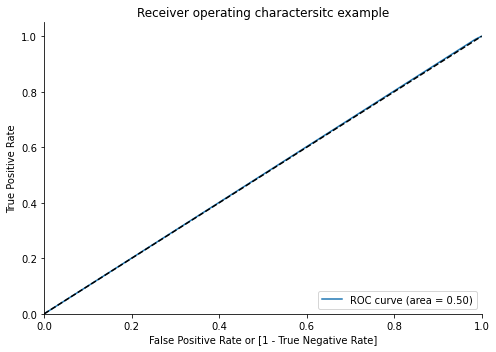

roc_auc_score : 0.50


In [233]:
draw_roc(y_train_df.Class, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

In [234]:
# make predictions
pred_probs_test = dt_final.predict(X_test_dt)
#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_dt,pred_Class=pred_probs_test)

Roc_auc_score : 0.5100694677495134
Sensitivity/Recall : 0.5138297872340426
Specificity: 0.5063091482649842
False Positive Rate: 0.49369085173501576
Positive predictive value: 0.6067839195979899
Negative Predictive value: 0.41259640102827766
Precision: 0.6067839195979899
Accuracy: 0.5108005082592122
F1 Score: 0.5564516129032258


Model                            
Train/Test                       
Roc_auc_score                0.51
Sensitivity                  0.51
Specificity                  0.51
FPR                          0.49
Positive predictive value    0.61
Negative Predictive value    0.41
Precision                    0.61
Accuracy                     0.51
F1-Score                     0.56
dtype: object

In [235]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)

Roc_auc_score : 0.5869328478421371
Sensitivity/Recall : 0.5882978723404255
Specificity: 0.5855678233438486
False Positive Rate: 0.4144321766561514
Positive predictive value: 0.6779037695372356
Negative Predictive value: 0.4896142433234421
Precision: 0.6779037695372356
Accuracy: 0.5871982210927573
F1 Score: 0.6299302292467606


     prob  accuracy     sensi     speci
0.0   0.0  0.597205  1.000000  0.000000
0.1   0.1  0.597205  1.000000  0.000000
0.2   0.2  0.597205  1.000000  0.000000
0.3   0.3  0.604034  0.990957  0.030363
0.4   0.4  0.619123  0.894681  0.210568
0.5   0.5  0.587198  0.588298  0.585568
0.6   0.6  0.496347  0.239894  0.876577
0.7   0.7  0.412325  0.021543  0.991719
0.8   0.8  0.402795  0.000000  1.000000
0.9   0.9  0.402795  0.000000  1.000000


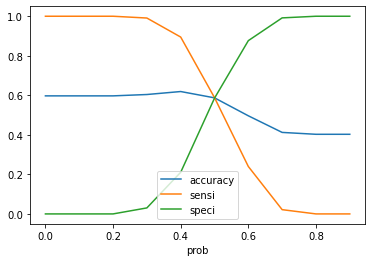

<Figure size 504x360 with 0 Axes>

In [236]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [237]:
# predicting churn with cut-off 0.4
cut_off_prob=0.36
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5351936371568562
Sensitivity/Recall : 0.948936170212766
Specificity: 0.12145110410094637
False Positive Rate: 0.8785488958990536
Positive predictive value: 0.6155969634230504
Negative Predictive value: 0.616
Precision: 0.6155969634230504
Accuracy: 0.6156289707750953
F1 Score: 0.7467559648388447


In [238]:
#Lets see how it performs on test data.
y_test_df,series_metrics= predictClassWithProb(dt_final,X_test_dt,y_test_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5084149942949191
Sensitivity/Recall : 0.9095744680851063
Specificity: 0.10725552050473186
False Positive Rate: 0.8927444794952681
Positive predictive value: 0.601688951442646
Negative Predictive value: 0.4444444444444444
Precision: 0.601688951442646
Accuracy: 0.5864040660736975
F1 Score: 0.7242693773824651


# 3. Random Forest

In [239]:
# Creating Train-Test variables for Random Forest
X_train_rf = pd.DataFrame(X_train_pca)
y_train_rf = pd.DataFrame(y_train_res)
X_test_rf = pd.DataFrame(X_test_pca)
y_test_rf = y_test

In [240]:
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20, oob_score=True)

In [241]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [242]:
rf.oob_score_

0.5914866581956798

In [243]:
# make predictions
pred_probs_test = rf.predict(X_test_rf)

#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_rf,pred_Class=pred_probs_test)

Roc_auc_score : 0.5026226592388751
Sensitivity/Recall : 0.9989361702127659
Specificity: 0.006309148264984227
False Positive Rate: 0.9936908517350158
Positive predictive value: 0.5984703632887189
Negative Predictive value: 0.8
Precision: 0.5984703632887189
Accuracy: 0.5991105463786531
F1 Score: 0.7485053806297329


Model                            
Train/Test                       
Roc_auc_score                 0.5
Sensitivity                     1
Specificity                  0.01
FPR                          0.99
Positive predictive value     0.6
Negative Predictive value     0.8
Precision                     0.6
Accuracy                      0.6
F1-Score                     0.75
dtype: object

In [244]:
parameters = {'max_depth': range(5, 40, 5)}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.454, test=0.446), total=   1.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.459, test=0.447), total=   1.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.451, test=0.447), total=   1.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.455, test=0.447), total=   1.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 40, 5)}, return_train_score=True,
             scoring='f1_weighted', verbose=1000)

In [245]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,2.712582,0.071515,0.022349,0.000612,30,{'max_depth': 30},0.497659,0.507347,0.491233,0.502700,...,0.499511,0.005372,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,2.513787,0.022133,0.021059,0.000813,20,{'max_depth': 20},0.482435,0.487050,0.496915,0.493546,...,0.488340,0.006009,2,1.000000,1.000000,0.999801,1.000000,0.999404,0.999841,0.000232
6,2.625692,0.076892,0.021568,0.000245,35,{'max_depth': 35},0.483814,0.485303,0.491635,0.481300,...,0.486488,0.003929,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,2.657606,0.073403,0.021787,0.000339,25,{'max_depth': 25},0.494723,0.486901,0.494879,0.468124,...,0.484873,0.010082,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,2.262531,0.021294,0.018441,0.000286,15,{'max_depth': 15},0.466969,0.459321,0.478304,0.467102,...,0.470632,0.008125,5,0.991446,0.988656,0.985461,0.984462,0.992245,0.988454,0.003107
1,1.758543,0.024781,0.015030,0.000440,10,{'max_depth': 10},0.451999,0.451980,0.447284,0.450233,...,0.451127,0.002286,6,0.769313,0.754789,0.773169,0.766084,0.800521,0.772775,0.015167
0,1.008117,0.007855,0.011089,0.000197,5,{'max_depth': 5},0.446136,0.446712,0.446712,0.446712,...,0.446597,0.000231,7,0.454354,0.459094,0.450626,0.454654,0.451972,0.454140,0.002895


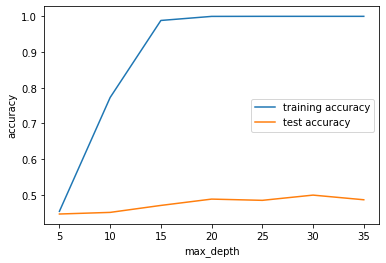

In [246]:
# grid_search.cv_results_

plot_traintestAcc(grid_search.cv_results_,'max_depth')

In [247]:
my_max_depth = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]

### Tuning n_estimators

In [248]:
parameters = {'n_estimators': range(5, 70, 5)}

rf = RandomForestClassifier(max_depth=my_max_depth,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=100, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.949, test=0.507), total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.953, test=0.513), total=   0.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.956, test=0.530), total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.956, test=0.510), total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

[CV] . n_estimators=40, score=(train=1.000, test=0.508), total=   1.1s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   21.6s remaining:    0.0s
[CV] n_estimators=40 .................................................
[CV] . n_estimators=40, score=(train=1.000, test=0.530), total=   1.1s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   22.7s remaining:    0.0s
[CV] n_estimators=40 .................................................
[CV] . n_estimators=40, score=(train=1.000, test=0.491), total=   1.1s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   23.8s remaining:    0.0s
[CV] n_estimators=40 .................................................
[CV] . n_estimators=40, score=(train=1.000, test=0.505), total=   1.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   24.8s remaining:    0.0s
[CV] n_estimators=45 .................................................
[CV] . n_estimators=45, score=(train=1.000, test=0.501), total=   1.2s
[Parallel(n_jobs=1)]: Done  41 out of  41

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, random_state=10),
             param_grid={'n_estimators': range(5, 70, 5)},
             return_train_score=True, scoring='f1_weighted', verbose=100)

In [249]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.396173,0.015074,0.004931,0.000150,15,{'n_estimators': 15},0.514855,0.529594,0.541682,0.501168,...,0.519954,0.014142,1,0.997020,0.996226,0.996623,0.996226,0.996027,0.996424,0.000355
0,0.135473,0.007799,0.002811,0.000096,5,{'n_estimators': 5},0.507116,0.512965,0.530184,0.509802,...,0.516389,0.008503,2,0.949308,0.952593,0.955760,0.955558,0.952786,0.953201,0.002358
3,0.528768,0.011290,0.006016,0.000163,20,{'n_estimators': 20},0.505826,0.532018,0.533733,0.501132,...,0.515385,0.014370,3,0.999007,0.999206,0.999007,0.999404,0.999007,0.999126,0.000159
5,0.792317,0.017850,0.008244,0.000357,30,{'n_estimators': 30},0.526374,0.519545,0.523668,0.496960,...,0.514989,0.010901,4,1.000000,0.999801,1.000000,1.000000,1.000000,0.999960,0.000079
4,0.663948,0.017752,0.006975,0.000258,25,{'n_estimators': 25},0.509719,0.525283,0.521738,0.502228,...,0.512424,0.009480,5,0.999603,0.999206,0.999801,0.999603,0.999603,0.999563,0.000195


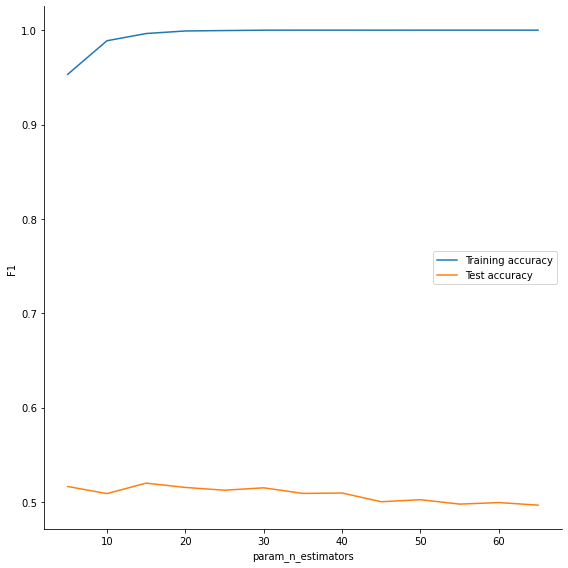

In [250]:
random_forst_feature_graph(grid_search, "n_estimators")

In [251]:
my_n_estimator = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]

### Tuning max_features

In [252]:
parameters = {'max_features': [5, 10, 15, 20, 25, 30,50,70]}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=0.996, test=0.520), total=   0.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=0.995, test=0.547), total=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=0.995, test=0.532), total=   0.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=0.994, test=0.532), total=   0.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, n_estimators=15,
                                              random_state=10),
             param_grid={'max_features': [5, 10, 15, 20, 25, 30, 50, 70]},
             return_train_score=True, scoring='f1_weighted', verbose=1000)

In [253]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,1.288639,0.041411,0.004879,0.000169,25,{'max_features': 25},0.523446,0.536873,0.556239,0.535051,...,0.538049,0.010534,1,0.994437,0.992446,0.993839,0.996623,0.995828,0.994635,0.001472
0,0.296370,0.010639,0.004797,0.000090,5,{'max_features': 5},0.519900,0.546688,0.532450,0.532238,...,0.532410,0.008522,2,0.995629,0.995431,0.995232,0.994438,0.997021,0.995550,0.000839
1,0.557693,0.016426,0.004946,0.000073,10,{'max_features': 10},0.526516,0.511007,0.537130,0.537041,...,0.527705,0.009560,3,0.996821,0.997020,0.994834,0.996226,0.995629,0.996106,0.000801
2,0.809222,0.026927,0.004944,0.000088,15,{'max_features': 15},0.514567,0.523733,0.536539,0.521317,...,0.525115,0.007438,4,0.997616,0.996623,0.994635,0.996226,0.995033,0.996027,0.001081
6,2.641169,0.112710,0.004896,0.000121,50,{'max_features': 50},0.507314,0.531159,0.522317,0.514195,...,0.519705,0.008205,5,0.996027,0.994239,0.995629,0.996623,0.996822,0.995868,0.000918
5,1.569716,0.053661,0.004871,0.000097,30,{'max_features': 30},0.532521,0.507153,0.501071,0.532879,...,0.518321,0.012930,6,0.996822,0.995629,0.995829,0.994636,0.996822,0.995948,0.000821
3,1.065049,0.031813,0.004853,0.000122,20,{'max_features': 20},0.525368,0.521972,0.534541,0.495967,...,0.516387,0.014211,7,0.995630,0.995629,0.994437,0.996226,0.995629,0.995510,0.000584
7,0.009887,0.000851,0.000000,0.000000,70,{'max_features': 70},NaN,NaN,NaN,NaN,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


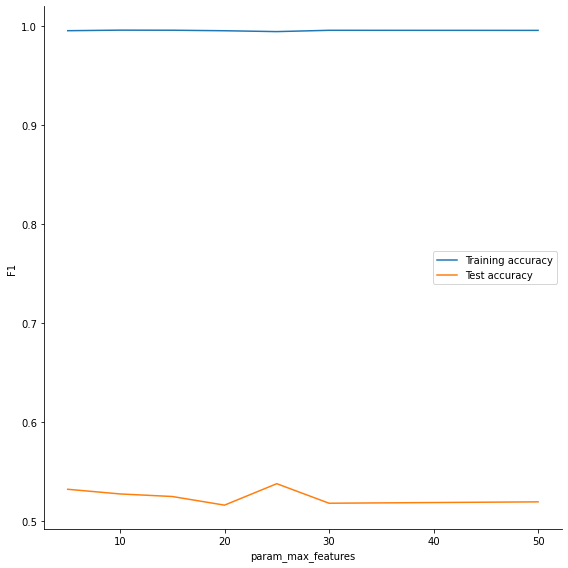

In [254]:
random_forst_feature_graph(grid_search, "max_features")

In [255]:
my_max_features=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

### Tuning min_samples_leaf

In [256]:
parameters = {'min_samples_leaf': range(1, 500, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=0.994, test=0.523), total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=0.992, test=0.537), total=   1.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=0.994, test=0.556), total=   1.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=0.997, test=0.535), total=   1.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 

[CV]  min_samples_leaf=351, score=(train=0.447, test=0.447), total=   0.3s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   21.2s remaining:    0.0s
[CV] min_samples_leaf=351 ............................................
[CV]  min_samples_leaf=351, score=(train=0.447, test=0.447), total=   0.3s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   21.5s remaining:    0.0s
[CV] min_samples_leaf=351 ............................................
[CV]  min_samples_leaf=351, score=(train=0.447, test=0.447), total=   0.3s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   21.8s remaining:    0.0s
[CV] min_samples_leaf=351 ............................................
[CV]  min_samples_leaf=351, score=(train=0.446, test=0.447), total=   0.3s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   22.1s remaining:    0.0s
[CV] min_samples_leaf=401 ............................................
[CV]  min_samples_leaf=401, score=(train=0.447, test=0.446), total=   0.3s
[Parallel(n_jobs=1)]:

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, max_features=25,
                                              n_estimators=15,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(1, 500, 50)},
             return_train_score=True, scoring='f1_weighted', verbose=1000)

In [257]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.321417,0.050596,0.004955,0.000128,1,{'min_samples_leaf': 1},0.523446,0.536873,0.556239,0.535051,...,0.538049,0.010534,1,0.994437,0.992446,0.993839,0.996623,0.995828,0.994635,0.001472
1,0.686918,0.039078,0.004140,0.000044,51,{'min_samples_leaf': 51},0.465971,0.479617,0.481077,0.471927,...,0.477343,0.007668,2,0.584322,0.589422,0.577623,0.604702,0.601160,0.591446,0.010159
2,0.526516,0.025878,0.003739,0.000136,101,{'min_samples_leaf': 101},0.446747,0.446640,0.456295,0.461446,...,0.453590,0.005910,3,0.492609,0.476931,0.481379,0.490691,0.493073,0.486937,0.006556
3,0.439678,0.016935,0.003598,0.000112,151,{'min_samples_leaf': 151},0.452555,0.446340,0.449943,0.457664,...,0.450553,0.004268,4,0.459585,0.456736,0.449798,0.459726,0.457620,0.456693,0.003632
6,0.316684,0.012475,0.003314,0.000026,301,{'min_samples_leaf': 301},0.446136,0.446712,0.446712,0.446712,...,0.446597,0.000231,5,0.447165,0.446568,0.446568,0.446568,0.446475,0.446669,0.000251
7,0.288261,0.010277,0.003206,0.000076,351,{'min_samples_leaf': 351},0.446136,0.446712,0.446712,0.446712,...,0.446597,0.000231,5,0.446712,0.446568,0.446568,0.446568,0.446475,0.446578,0.000076
8,0.263620,0.009760,0.003184,0.000053,401,{'min_samples_leaf': 401},0.446136,0.446712,0.446712,0.446712,...,0.446597,0.000231,5,0.446712,0.446568,0.446568,0.446568,0.446568,0.446597,0.000058
9,0.260550,0.007590,0.003960,0.000543,451,{'min_samples_leaf': 451},0.446136,0.446712,0.446712,0.446712,...,0.446597,0.000231,5,0.446712,0.446568,0.446568,0.446568,0.446568,0.446597,0.000058
5,0.354525,0.018475,0.003399,0.000064,251,{'min_samples_leaf': 251},0.446136,0.446712,0.446712,0.446340,...,0.446448,0.000228,9,0.447617,0.446568,0.446475,0.446927,0.447020,0.446922,0.000404
4,0.390387,0.016170,0.003471,0.000030,201,{'min_samples_leaf': 201},0.445764,0.446712,0.446712,0.446712,...,0.446299,0.000509,10,0.450132,0.448826,0.447924,0.447020,0.451238,0.449028,0.001510


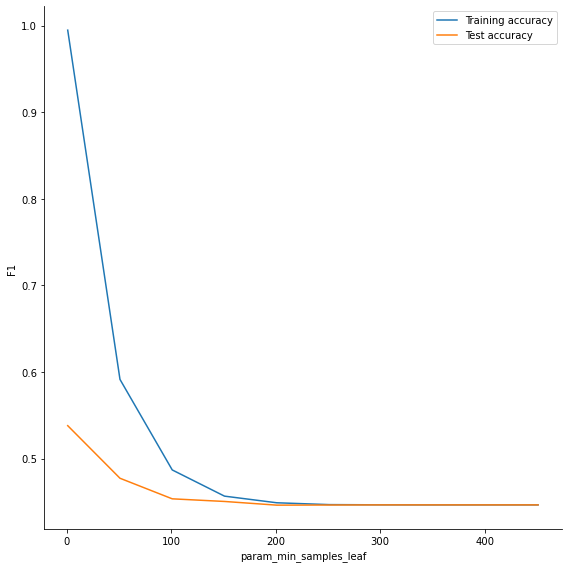

In [258]:
random_forst_feature_graph(grid_search, "min_samples_leaf")

In [259]:
my_min_sample_leaf = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_leaf'].iloc[0]

### Tuning min_samples_split

In [260]:
parameters = {'min_samples_split': range(50, 550, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, min_samples_leaf = my_min_sample_leaf,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.880, test=0.505), total=   1.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.883, test=0.498), total=   1.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.881, test=0.523), total=   1.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.884, test=0.493), total=   1.1s
[Parallel(n_jobs=1)]: Done   4 out

[CV]  min_samples_split=400, score=(train=0.503, test=0.461), total=   0.8s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   34.4s remaining:    0.0s
[CV] min_samples_split=400 ...........................................
[CV]  min_samples_split=400, score=(train=0.497, test=0.459), total=   0.8s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   35.2s remaining:    0.0s
[CV] min_samples_split=400 ...........................................
[CV]  min_samples_split=400, score=(train=0.515, test=0.465), total=   0.7s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   35.9s remaining:    0.0s
[CV] min_samples_split=400 ...........................................
[CV]  min_samples_split=400, score=(train=0.493, test=0.462), total=   0.7s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   36.6s remaining:    0.0s
[CV] min_samples_split=450 ...........................................
[CV]  min_samples_split=450, score=(train=0.493, test=0.454), total=   0.7s
[Parallel(n_jobs

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, max_features=25,
                                              n_estimators=15,
                                              random_state=10),
             param_grid={'min_samples_split': range(50, 550, 50)},
             return_train_score=True, scoring='f1_weighted', verbose=1000)

In [261]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.154629,0.041890,0.004431,0.000034,50,{'min_samples_split': 50},0.504868,0.497701,0.523491,0.492722,...,0.512634,0.019005,1,0.879769,0.883039,0.880893,0.883992,0.890087,0.883556,0.003593
1,1.009735,0.031886,0.004276,0.000137,100,{'min_samples_split': 100},0.485487,0.483389,0.493994,0.493292,...,0.496316,0.015139,2,0.750488,0.736335,0.737559,0.746890,0.766469,0.747548,0.010887
2,0.962690,0.077950,0.004396,0.000724,150,{'min_samples_split': 150},0.484049,0.476372,0.480280,0.476422,...,0.479936,0.003129,3,0.666636,0.651048,0.656227,0.669724,0.642229,0.657173,0.010088
3,0.897241,0.030436,0.004113,0.000187,200,{'min_samples_split': 200},0.475274,0.470257,0.468876,0.468938,...,0.472994,0.004912,4,0.609562,0.587797,0.577465,0.610109,0.594819,0.595950,0.012611
4,0.872299,0.030827,0.004217,0.000160,250,{'min_samples_split': 250},0.459585,0.460526,0.470362,0.477089,...,0.467585,0.006627,5,0.575459,0.557387,0.557592,0.580248,0.561219,0.566381,0.009586
5,0.813805,0.033223,0.004087,0.000050,300,{'min_samples_split': 300},0.462563,0.462661,0.459748,0.463208,...,0.462266,0.001285,6,0.549602,0.540892,0.524714,0.550746,0.530527,0.539296,0.010290
7,0.745108,0.045235,0.003765,0.000129,400,{'min_samples_split': 400},0.455424,0.461033,0.458757,0.464826,...,0.460380,0.003149,7,0.525454,0.502735,0.497352,0.515141,0.493346,0.506806,0.011869
6,0.770544,0.056129,0.003881,0.000198,350,{'min_samples_split': 350},0.457522,0.465640,0.458045,0.456049,...,0.458800,0.003487,8,0.526208,0.521198,0.514622,0.533172,0.500380,0.519116,0.011166
9,0.696439,0.044413,0.003827,0.000068,500,{'min_samples_split': 500},0.451389,0.455425,0.455119,0.458928,...,0.456673,0.003768,9,0.486876,0.485287,0.479373,0.497187,0.482519,0.486249,0.006036
8,0.729985,0.040353,0.003963,0.000204,450,{'min_samples_split': 450},0.454441,0.452209,0.454727,0.462723,...,0.455878,0.003579,10,0.493175,0.492823,0.488584,0.503387,0.485338,0.492661,0.006093


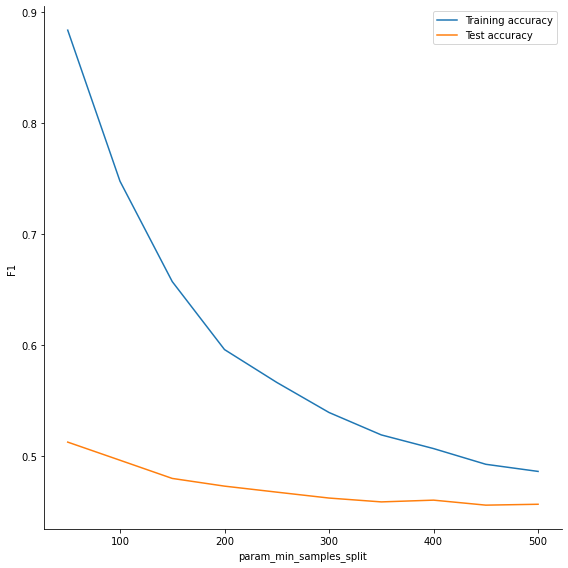

In [262]:
random_forst_feature_graph(grid_search, "min_samples_split")

In [263]:
my_min_samples_split=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]

### Final Model

In [264]:
rf_final = RandomForestClassifier(max_depth=my_max_depth,
                                  n_estimators = my_n_estimator, 
                                  max_features = my_max_features, 
                                  min_samples_leaf = my_min_sample_leaf,
                                  min_samples_split=my_min_samples_split,
                                  random_state=123)

In [265]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_rf,y_train_rf)

Model performance on Train data:

Model Report
Accuracy : 0.869
Recall/Sensitivity : 0.983
AUC Score (Train): 0.977031
CV Score : Mean - 0.565 | Std - 0.00821 | Min - 0.554 | Max - 0.58


In [266]:
# predict on test data
predictions = rf_final.predict(X_test_rf)

In [267]:
print("Model performance on Test data:")
getModelMetrics(y_test_rf,predictions)

Model performance on Test data:
Roc_auc_score : 0.5006359487213906
Sensitivity/Recall : 0.8372340425531914
Specificity: 0.1640378548895899
False Positive Rate: 0.8359621451104101
Positive predictive value: 0.5975702353834472
Negative Predictive value: 0.4046692607003891
Precision: 0.5975702353834472
Accuracy: 0.5660736975857688
F1 Score: 0.6973859105006645


Model                            
Train/Test                       
Roc_auc_score                 0.5
Sensitivity                  0.84
Specificity                  0.16
FPR                          0.84
Positive predictive value     0.6
Negative Predictive value     0.4
Precision                     0.6
Accuracy                     0.57
F1-Score                      0.7
dtype: object

In [268]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob)

Roc_auc_score : 0.8685939492583394
Sensitivity/Recall : 0.9832446808510639
Specificity: 0.7539432176656151
False Positive Rate: 0.24605678233438485
Positive predictive value: 0.8555889840314742
Negative Predictive value: 0.9681012658227848
Precision: 0.8555889840314742
Accuracy: 0.8908831003811944
F1 Score: 0.9149857690879841


     prob  accuracy     sensi     speci
0.0   0.0  0.597205  1.000000  0.000000
0.1   0.1  0.597205  1.000000  0.000000
0.2   0.2  0.597205  1.000000  0.000000
0.3   0.3  0.610388  1.000000  0.032729
0.4   0.4  0.715534  0.999734  0.294164
0.5   0.5  0.890883  0.983245  0.753943
0.6   0.6  0.895489  0.847074  0.967271
0.7   0.7  0.679956  0.465160  0.998423
0.8   0.8  0.452827  0.083777  1.000000
0.9   0.9  0.405019  0.003723  1.000000


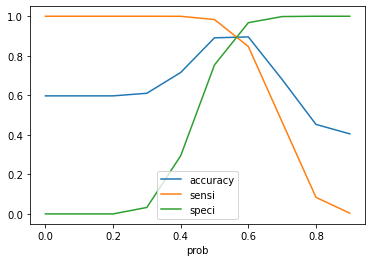

<Figure size 504x360 with 0 Axes>

In [269]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [270]:
## Training Data 
cut_off_prob=0.25

y_train_df,series_metrics=predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob,model_name='Random Forest',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)
y_train_df.head()

Roc_auc_score : 0.5031545741324921
Sensitivity/Recall : 1.0
Specificity: 0.006309148264984227
False Positive Rate: 0.9936908517350158
Positive predictive value: 0.5987261146496815
Negative Predictive value: 1.0
Precision: 0.5987261146496815
Accuracy: 0.5997458703939009
F1 Score: 0.749003984063745


,Class,Class_Prob,final_predicted
0,1,0.805436,1
1,0,0.460257,1
2,1,0.671314,1
3,0,0.310301,1
4,0,0.395392,1


In [271]:
# Testing Data
y_test_df,series_metrics= predictClassWithProb(rf_final,X_test_rf,y_test_rf,cut_off_prob,model_name='Random Forest',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5
Sensitivity/Recall : 1.0
Specificity: 0.0
False Positive Rate: 1.0
Positive predictive value: 0.5972045743329097
Negative Predictive value: nan
Precision: 0.5972045743329097
Accuracy: 0.5972045743329097
F1 Score: 0.7478122513922036


# Conclusion

- We are getting Low Accuracy (in late 50s) and low precision (in late 50s) which is too poor to be acceptable